In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle
# hide_toggle(cnt=0)


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Bedste vaner i programmering <a class='tocSkip'></a>
## Med Python <a class='tocSkip'></a>
## Version 0.1, Januar 2019 (Dansk) <a class='tocSkip'></a>


> I dette dokument vil vi se på nogle gode vaner at have når vi programmerer 
> løsninger til et givent problem.   Programmering er i høj grad en øvelse i at 
> løse problemer, og vores løsninger har tit karaketer af en model af et given 
> reelt system eller lignende.  Vi vil derfor tale om vores programmer som
> _løsningsmodeller_ til et _givent_ problem.  Nogle af de punkter vi vil gennemgå 
> her er generelle i den forstand at de ikke _kun_ gælder for programmeret
> løsningsmodeller eller henhenvender sig til et specifikt programmeringsparadigme 
> eller -sprog.  Andre punkter er mere specifikke for Python og de paradigmer som 
> det sprog tilhører. 

### Niels Bohr Institutet <a class='tocSkip'></a>

### Christian Holm Christensen <a class='tocSkip'></a>

# Best Practises in programming <a class='tocSkip'></a>
## With Python <a class='tocSkip'></a>
## Version 0.1, January 2019 (English) <a class='tocSkip'></a>


> In this note we will look at some best practices when programming
> solutions for a given problem. Programming is very much an exercise in 
> problemsolving, and our solutions often have the characteristics of a model of a given
> real system. We will therefore talk about our programs as
> _solution models_ to a _given_ problem. Some of the points we will review
> here are general in the sense that they are not _only_ applicable to the program
> solutions or refer to a specific programming paradigm
> or language. Other points are more specific to Python and the paradigms that
> the language belongs to.

### Niels Bohr Institute <a class='tocSkip'></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import scipy as sp
import scipy.stats

# Planlæg din løsning

# Plan your solution

Inden vi overhovedet tænder for vores computer bør vi tænke over det problem vi søger at løse.  Vi kan for eksempel stille en række spørgsmål til problemet så som 

- Hvilke dele indgår i vores problem? 
  - Hvordan interagere disse dele? 
  - Har disse dele noget tilfældes
  - ...
- Hvilke grænsebetingelser er der for vores problem? 
  - Er der løsninger der er "urimelige"? 
  - Er der patalogiske områder? 
  - Er der områder hvor vi kender løsningen?
  - ...
- Hvilken præcision kan vi forvente? 
  - Hvilke tilnærmelser giver mening? 
  - Hvor gode er disse tilnærmelser 
  - ...

Disse spørgsmål er langt fra udtømmende og skal ses som en inspirration.  

Svarene på spørgsmål som dem givet ovenover kan oftes svares _inden_ vi faktisk laver vores løsningsmodel.  Vi kan besvare mange af den slags spørgsmål ved at bruge vores forståelse af systemet.   For eksempel vil vi kunne svare på denne slags spørgsmål om et mekanisk system ud fra vores kendskab til Newtons love. 

Inden vi faktisk kaster os over at lave vores løsningsmodel skal vi forholde os til problemet udfra vores forståelse af systemet. 

- Skriv ned hvad problemet er. Hvis problemet er givet i en opgave, så skriv ned med egne ord hvad problemet er. 
- Formulér en række spørgsmål til problemet og skriv dem og deres svar ned. 

Med dette i baghånden kan vi nemmere overskue hvilke elementer der er væsentlige for vores løsning. Hvis vi for eksempel søger en løsning til et mekanisk system kan vi nu skrive ned ville krafter og elementer der i spil.  Hvis vi vil modellerer mange partikler kan vi skrive ned hvilke egenskaber ved partiklerne vi har brug for.  

- Skriv de _væsentlige_ elementer for problem ned. 

Når vi på den måde har fået et overblik over hvad der er væsentligt for vores problem nærmerer vi os vores løsnings-_model_. Vi kan begynde at tænke over hvorledes vi vil _repræsenterer_ de væsentlige elementer i vores problem.   Krafter, for eksempel, repræsenteres i mange tilfælde bedst ved vektorer, partikler ved egenskaberne _masse_, _impuls_, _ladning_ og så videre, mens områder kan repræsenteres ved hjælp gitre. 

Ligegyldigt hvordan vi vælger at repræsenterer vores elementer bør vi overveje hvilke begrænsninger disse valg påfører vores løsning.  Har vi for eksempel repræsenteret et område med et gitter så er vi begrænset til at lave udregninger alene i knudepunkterne, eller hvis vi angiver krafter som konstante vektorer så kan vi ikke have tids- eller rumafhængige krafter.  Der bør selvfølgelig være overensstemmelse mellem disse begrænsinger og vores forståelse af problemet som udtrykt i de svar vi gav tidligere.   For eksempel, beregner vi en løsning på et gitter kan vi med forståelsen af den forventet præcision sige noget om hvor fintmasket vi bør lave vores gitter. 

- Skriv ned hvorledes vi vil repræsenterer de væsentlige elementer af vores problem i vores løsningsmodel.

Dernæst skal vi overveje vores beregningsmodel.   Kender vi for eksempel en eksakt løsning til problem, så kan vi vælge at bruge den.  Er vores problem givet ved en differential ligning så kan vi ofte bruge funktioner som `scipy.integrate.solve_ivp` som kræver at vi specificere afledte og begyndelsesbetingelser.  Simulerer vi partikelstød har vi tit brug for en tidsudvikling med stokastiske processor. 

- Skriv vores beregningsmodel ned. 
  - Hvis der for eksempel indgår stokastiske processor, så skriv dem ned.
  - Hvis vi vi har andre del-beregninger, så skriv dem ned.

Vi har nu (næsten) alle dele af vores løsningsmodel og vi kan kaste os over at implementerer den i kode.  

- De spørgsmål og svar vi har stillet problemet er vores rettesnor.
- Valget af væsentlige elementer og hvorledes vi vil repræsenterer dem dikterer hvorledes vi vil behandle dem i vores kode.
- Vores valg af beregningsmodel fortæller os hvorledes vi vil udfører vores beregninger i problemet. 

Når vi begynder at implementerer vores løsningsmodel vil vi nogen gange komme ud for at vores løsningsmodel ikke var helt adækvat - det vil sige, ikke indfangede problemet godt nok.  Det skal vi ikke blive frustreret over.  Hvis vi kommer der til så går vi tilbage og ser på vores løsningsmodel.  

- Hvis vores løsningsmodel viser sig ikke at være adækvat, så revidér løsningsmodellen ved for eksempel
  - formulerer nye spørgsmål
  - forbedre svar til spørgsmål
  - tilføj eller fjern elementer 
  - vælg en anden beregningsmodel

At komme frem til den endelige løsningsmodel er som oftest en _iterativ_ process:  Vi starter ud med en idé, og forsøger os derfra. Vi reviderer denne idé og forsøger igen og gentager denne process indtil vi kommer frem til en løsning. 

Before we even turn on our computer, we should think about the problem we are trying to solve. For example, we can ask a number of questions to the problem such as

- What parts are included in our problem?
  - How do these parts interact?
  - Do these parts have something in common?
  - ...
- What are the boundary conditions to our problem?
  - Are there solutions that are "unreasonable"?
  - Are there pathological areas?
  - Are there areas where we know the solution?
  - ...
- What precision can we expect?
  - What approximations make sense?
  - How good are these approximations?
  - ...

These questions are far from exhaustive and should be seen as an inspiration.

The answers to questions like those above can often be answered _before_ we actually do our solution. We can answer many of these questions by using our understanding of the system. For example, we will be able to answer these kinds of questions about a mechanical system based on our knowledge of Newton's laws.

Before we actually throw ourselves at making our solution, we must relate to the problem based on our understanding of the system.

- Write down what the problem is. If the problem is given in a task, write down in your own words what the problem is.
- Form a number of questions to the problem and write them down and their answers down.

With this in the bag, we can more easily understand which elements are important for our solution. For example, if we are looking for a solution for a mechanical system, we can now write down forces and elements in play. If we want to model many particles, we can write down which properties of the particles we need.

- Write down the _essential_ problem elements.

Once we have an overview of what is important to our problem, we approach our solution _model_. We can start thinking about how we will _represent_ the essential elements of our problem. For example, forces are best represented by vectors, particles by the properties _mass_, _mometum_, _charge_, and so on, while areas can be represented by grids .

No matter how we choose to represent our elements, we should consider what limitations these choices enforces on our solution. For example, if we have represented an area with a grid then we are limited to making calculations only at the nodes, or if we indicate forces as constant vectors then we cannot have time or space dependent forces. Of course, there should be consistency between these limitations and our understanding of the problem as expressed in the answers we gave earlier. For example, we calculate a solution on a grid we can with the understanding of the expected precision say something about how finely we should make our grid.

- Write down how we will represent the essential elements of our problem in our solution.

Next, we must consider our calculation model. For example, if we know an exact solution to a problem, then we can choose to use it. If our problem is given by a differential equation then we can often use functions such as `scipy.integrate.solve _ivp` which requires that we specify derivative and initial conditions. If we simulate particle collisions, we often need a time development with stochastic processor.

- Write down our calculation model.
  - For example, if stochastic processor is included, write them down.
  - If we have other partial calculations, write them down.

We now (almost) have all parts of our solution and we can throw ourselves at implementing it in code.

- The questions and answers we have asked the problem are our guide.
- The choice of essential elements and how we will represent them dictates how we will treat them in our code.
- Our choice of calculation model tells us how we will perform our calculations of the problem.

When we begin to implement our solution, we will sometimes find out that our solution was not entirely adequate - that is, did not capture the problem well enough. We must not be frustrated with that. If we get to this we go back and look at our solution model.

- If our solution proves to be inadequate, revise the solution model for example
  - formulates new questions
  - Improve answers to questions
  - Add or remove items
  - Select another calculation model

Getting to the final solution is usually a_ iterative_ process: We start out with an idea and try us from there. We revise this idea and try again and repeat this process until we reach a solution.

## Opsummering

- Skriv ned hvad problemet er. 
- Formulér en række spørgsmål til problemet og skriv dem og deres svar ned. 
- Skriv de _væsentlige_ elementer for problem ned.
- Skriv ned hvorledes vi vil repræsenterer de væsentlige elementer af vores problem i vores løsningsmodel. 
- Skriv vores beregningsmodel ned.
  - Hvis der for eksempel indgår stokastiske processor, så skriv dem ned.
  - Hvis vi vi har andre del-beregninger, så skriv dem ned.

## Summary

- Write down what the problem is.
- Form a number of questions to the problem and write them and their answers down.
- Write down the _essential_ problem elements.
- Write down how we will represent the essential elements of our problem in our solution.
- Write down our calculation model.
  - For example, if stochastic processes are included, write them down.
  - If we have other partial calculations, write them down.

# Del din løsning op i overskuelige bider 

# Split your solution into smaller pieces

Vores beregningsmodel i vores løsningsmodel består ofte af et antal del-beregninger.  For nemere at kunne overskue koden deler vi vores kode op i mindre bider svarende til disse del-beregninger.   Konkret vil vi typisk lave en _funktion_ for hver del-beregning, men andre måder kan også bruges (for eksempel via _Objekt-Orienteret_ strategier).  

Vi deler koden op i mindre bider af flere grunde. 

## Bedre overskuelighed

At dele vores løsning op i mindre bidder gør at vi bedre kan gennemskue hvad hver enkelt del gør.  Har vi for eksempel 100 linjer kode kan det være svært at holde styr på hvilke variable der bliver brugt til hvad, og hvornår vi ændre på dem.  Deler vi den samme kode op i 10 eller 20 dele, hver på en 5 til 10 linjer, så bliver det nemmere at overskue hver del.  

## Mere struktur 

Hver bid af vores løsning bør gøre én ting.  Lad os sige at vi skal beskrive tidudviklingen af et system hvor vi har brug for de tidsafledte størrelser.  Her vil vi lave en simpel funktion som beregner disse tidsafledte og for eksempel kalde den for `timeDerivative`.   Når vi ser kald til denne funktion i koden ved vi med det samme hvad der sker der. 

Our calculation model in our solution often consists of a number of partial calculations. To be able to get clear overview of the code, we divide our code into smaller bites corresponding to these partial calculations. Specifically, we will typically create a _function_ for each partial calculation, but other ways can also be used (for example, through _Object Oriented_ strategies).

We split the code into smaller bites for several reasons.

## Clearer overview

Splitting our solution into smaller chunks means that we can better see what each part does. For example, if we have 100 lines of code, it can be difficult to keep track of which variables are used for what and when we change them. If we divide the same code into 10 or 20 parts, each 5 to 10 lines, it will be easier to understand each part.

## More structure

Every bit of our solution should do one thing. Let's say we must describe the time development of a system where we need the time-derived quantaties. Here we will make a simple function that calculates these time derivatives and, for example, call it `timeDerivative`. When we look at this function in the code, we immediately know what is going on.

### Genbrug af kode 

Ofte vil vi lave den samme beregning, med små variationer, flere gange i løbet af vores løsning.  Det kan for eksempel være at vi skal integrerer fordelinger flere gange.  Hvis vi laver en funktion _a la_

### Recycling code

Often we will do the same calculation, with small variations, several times during our solution. For example, we may have to integrate distributions several times. If we make a function like

In [3]:
def integrate(f,a,b,n):
    x,dx = np.linspace(a,b,n,retstep=True,endpoint=False)
    y = f(x+dx/2) 
    return np.sum(y*dx)

kan vi genbruge denne funktion hver gang vi vil integrerer en funktion.  

then we can reuse this function every time we want to integrate a function.

## Isolering af fejl

Har vi lavet en fejl i en bid i vores program som vi genbruger flere gange, så skal vi kun finde fejlen _én_ gang.  Havde vi derimod gentaget den samme kode flere gange, så skal vi finde fejlen _alle_ steder vi måtte have gentaget koden.  

Havde vi, for eksempel, i `integrate` ovenover glemt at specificerer `endpoint=False` eller ligge `dx/2` til `x` i evalueringen af `f`, så skal vi kun rette de fejl ét sted. 

## Isolation of errors

If we have made a mistake in a piace of our program that we reuse several times, we only need to find the error _once_. If, however, we repeated the same code several times, then we must find the error _all_ places we may have repeated the error.

If, for example, we had forgotten in `integrate` above to specify` endpoint = false` or add `dx / 2` to` x` in the evaluation of `f`, then we need only correct the errors in one place.

## Validering af kode stykker 

Vi vil komme nærmere ind på dette senere.  Essentielt er tanken at vi kan validerer _hver_ del for sig.  Hvis vi er overbevist om at hver del virker korrekt, så kan vi nemmere sige at hele vores løsning virker korrekt.  

## Validation of code pieces

We will discuss this later. Essentially, the idea is that we can validate _each_ part separately. If we are convinced that each part works correctly, then we can more easily feel confident that our entire solution works correctly.

## Eksempel: Partikelhenfald i laboratoriesystemet

## Example: Particle decay in the laboratory system

Lad os tage et eksempel hvor vi vil se nogle af disse ting i praksis.  

Vi vil propagerer partikler med massen $m=1$ (I enheder af $\mathrm{c}=1$) der henfalder til 2 andre partikler med massen $m=1/4$. Beregningen løber fra tiden $t=0$ til tiden $t=t_{\mathrm{max}}=5$ i skridt af $\Delta t=t_{\mathrm{max}}/500=0.01$. 

Her vil vi bruge relativistisk algebra, det vil sige [fir-vektorer](https://en.wikipedia.org/wiki/Four-vector), og vi sætter $\mathrm{c}=1$.  Da er hver partikel er karaketeriseret ved

- Fir-impulsen 

Let's take an example where we want to see some of these ideas in practice.

We will propagate particles with the mass $m=1$ (in units of $\mathrm{c}=1$) which decay into 2 other particles with the masses $m=1/4$. The calculation runs from time $t=0$ to time $t=t_{\mathrm{max}}=5$ in steps of $\Delta t=t_{\mathrm{max}}/500=0.01$.

Here we will use relativistic algebra i.e., [four-vectors](https://en.wikipedia.org/wiki/Four-vector), and we set $\mathrm{c}=1$. Then each particle is characterized by

- Four-momentum

  $$\tilde p = \begin{bmatrix} 
    E\\
    \vec p
    \end{bmatrix}
    = \begin{bmatrix}
      \sqrt{m^2+|\vec p|^2}\\
      \vec p
    \end{bmatrix}
    = \begin{bmatrix}
      \sqrt{m^2+p_x^2+p_y^2+p_z^2}\\
      p_x\\
      p_y\\
      p_z
    \end{bmatrix}\quad,
    $$

- Fir-stedet 

- Four-location

  $$\tilde s = \begin{bmatrix}
    t\\
    \vec s
    \end{bmatrix}
    = \begin{bmatrix}
    t\\
    s_x\\
    s_y\\
    s_z
    \end{bmatrix}\quad.
  $$

- Fir-stedet hvor partiklen blev skabt 

- The four-place where the particle was created

  $$\tilde s_0 = \begin{bmatrix}
    s_0\\
    \vec s_0
    \end{bmatrix}\quad.
  $$

- et flag om partiklen er henfaldet eller ej

Vi starter med 10 partikler med $m=1$, tilfældig $\tilde p$ og $\tilde s=\tilde s_0=0$.  Ovenover er $\vec p$ tre-impulsen af partiklen. 

- a flag if the particle has decayed or not

We start with 10 particles with $m=1$, random $\tilde p$ and $\tilde s=\tilde s_0=0$. $\vec p$ above is the three-momentum of the particle.

Når en partikel med fir-impuls $\tilde p$ henfalder "deler" de to henfaldsprodukter partiklens impuls og vi sætter 

When a particle with four-momentum $\tilde p$ decays then the two decay products "share" the particle's momentum and we set

\begin{align*}
  m_1 = m_2 &= m/4\\
  p_1 = p_2 &= \frac{Q}{2}=\frac12\sqrt{m^2-\tfrac{m^2}4}=\frac{\sqrt{3}}{4}m\quad,
\end{align*}

hvor $p_1,p_2$ er impulsen af det to henfaldsprodukter. Vi vælger spredningsvinklerene  $\vartheta$ og $\varphi$ tilfældigt i henholdsvis $[0,\pi)$ og $[0,2\pi)$ i den henfaldende partiklens hvilesystem, og beregner 4-impulserne for henfaldsprodukterne i denne ramme ved

where $p_1,p_2$ are the momenta of the two decay products. We select the scattering angles $\vartheta$ and $\varphi$ randomly in $[0,\pi)$ and $[0,2\pi)$, respectively, in the rest system of the decaying particle, and calculate the 4-momenta for the decay products in this frame as

\begin{align*}
 \vec{\delta} &= 
    \begin{bmatrix} 
      \cos\vartheta\sin\varphi\\
      \sin\vartheta\sin\varphi\\
      \cos\vartheta
    \end{bmatrix}\\
  \tilde p'_1 &= \begin{bmatrix} E_1\\p_1\vec\delta\end{bmatrix} 
  = \begin{bmatrix} \sqrt{m_1^2+p_1^2}\\ \frac{Q}{2}\vec\delta\end{bmatrix}
  = \begin{bmatrix} \sqrt{\tfrac1{16}m^2+\frac{3}{16}m^2}\\ \tfrac{\sqrt{3}}4m\vec\delta \end{bmatrix}
  = \begin{bmatrix}\tfrac 12m\\ \tfrac{\sqrt{3}}{4}m\vec\delta\end{bmatrix}
  = \frac12 m \begin{bmatrix} 1\\ \tfrac{\sqrt{3}}2\vec\delta\end{bmatrix}\\
  \tilde p'_2 &= \frac12 m \begin{bmatrix} 1\\-\tfrac{\sqrt{3}}2\vec\delta\end{bmatrix}\\
\end{align*}

Fir-stederne for de to henfaldsprodukter der sker i fir-stedet $\tilde s$ i hvilerammen da 

The four-locations of the two decay products occurring at $\tilde s$ in the rest frame is then

\begin{align*}
  \tilde s'_1 &= \tilde s'_2 = \begin{bmatrix} 0\\ \vec s\end{bmatrix}\quad.
\end{align*}

Bemærk at vi sætter tiden til 0 i denne ramme. 

For at transformerer tilbage til laboratoriesystemet skal vi lave en Lorentztransformation med hastigheden af hvilerammen som er givet ved hastigheden af den henfaldne partikel 

Note that we set the time to 0 in this frame.

To transform back into the laboratory system, we must make a Lorentz transformation with the velocity of the rest frame given by the velocity of the decaying particle

\begin{align*}
 \vec p &= m\gamma\vec v = m\frac{E}{m}\vec v\\
 \vec v &= \frac{\vec p}{E}\quad.
\end{align*}

[Lorentztransformationen](https://en.wikipedia.org/wiki/Lorentz_transformation#Vector_transformations) af en fir-vector $\tilde u'=[u_0',\vec u']$ i rammen $F'$ som bevæger sig med hastigheden $\vec v$ i forhold til rammen $F$ er givet ved 

The [Lorentz transformation](https://en.wikipedia.org/wiki/Lorentz_transformation#Vector_transformations) of a four-vector $\tilde u'=[u_0',\vec u']$ in the frame $F'$ that moves with velocity $\vec v$ relative to the frame $F$ is given by

\begin{align*}
  \tilde u &= \begin{bmatrix} 
    \gamma (u_0' + \vec u'\cdot \vec v)\\
    \vec u' + (\gamma - 1)\frac{\vec u'\cdot \vec v}{|\vec v|^2}\vec v + \gamma u_0'\vec v
    \end{bmatrix}\quad,
\end{align*}

hvor $\gamma = 1/\sqrt{1-|\vec v|^2}$.  For transformation fra partiklens hvilesystem til laboratorie systemmet sætter vi $\vec v=\vec u$ og $\gamma = E/m$ og $m$ er den invariante masse givet ved normen (længden) af fir-vektoren 

where $\gamma = 1/\sqrt{1-|\vec v|^2}$. For transformation from the particle rest system to the laboratory system, we have $\vec v=\vec u$ and $\gamma = E/m$ and $m$ is the invariant mass given by the norm (length) of the four vector

$$ m = |\tilde p| = \sqrt{E^2 - |\vec p|^2}\quad.$$

For at afgøre om en partikel henfalder eller ej har vi brug for at besteme henfaldskonstanten 

In order to determine whether a particle decays or not, we need to determine the decay constant

$$\lambda = \frac{\log(2)}{\tau}=\log(2)m\quad,$$

hvor $\tau=\tfrac{1}{m}$ er halveringstiden i partiklens hvilesystem. Valget $\tau=\tfrac{1}{m}$
for en partikel med masse $m$ svarer til at lette partikler har en længere levetid en tungere partikler. Sandsynligheden for at partiklen henfalder i tidsintervalet $\Delta t'$ (i partiklens hvilesystem) er da 

where $\tau=\tfrac{1}{m}$ is the half-life in the particle's rest frame. The choice $\tau=\tfrac{1}{m}$
for a particle with mass $m$ corresponds to light particles having a longer lifetime than a heavier particle. The probability that the particle decays in the time interval $\Delta t'$ (in the rest frame of the particle) is then

$$P(\mathrm{decay}) = \lambda\Delta t'\quad.$$ 

Da vi vil tage tidsskridt i laboratriesystemet med størrelsen $\Delta t$ har vi brug for at transformerer til partiklernes hvilesystem for at få $\Delta t'$.  Denne transformation er er givet ved den inverse af Lorentztransformationen oven over og bliver 

Since we will take time steps of the size $\Delta t$ in the laboratory system, we need to transform into the rest frame of the particles to get $\Delta t'$. This transformation is given by the inverse of the Lorentz transformation above and becomes

$$
\Delta t'\gamma = \Delta t\quad\mathrm{eller}\quad\Delta t' = \frac{\Delta t}{\gamma}
$$

hvor $\gamma = E/m$ er partiklens Lorentzfaktor.  Vores endelige sandsynlighed for et henfald bliver da 

where $\gamma = E/m$ is the particle's Lorentz factor. Our final probability for a decay is then

$$P(\mathrm{decay}) = \frac{\Delta t}{\gamma} \log(2) m\quad,$$ 

og vi kan tage et tilfældigt tal og sammenligne med denne sandsynlighed for at se om vi har et henfald eller ej. 

Til sidst vil vi plotte partiklernes baner som et `quiver` plot. 

and we can take a random number and compare it to this probability to see if we have a decay or not.

Finally, we will plot the particles' trajectories as a `quiver` plot.

### Første forsøg - spagetti kode

I dette forsøg skriver vi vores løsning op som én lang kode blok uden at brug af funktioner eller dets lige. 

### First attempt - spaghetti code

In this attempt, we write our solution as one long code block without the use of functions or the like.

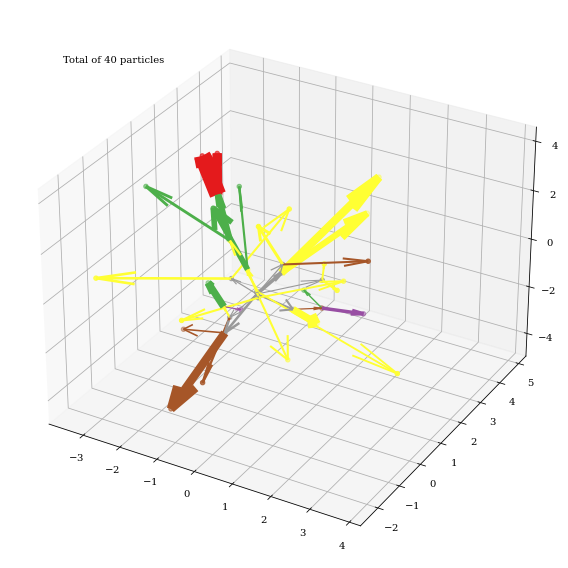

In [4]:
np.random.seed(123456)
# Set-up particles 
nParticles = 10
# Starting point
s = np.zeros((nParticles,4))
s0 = s.copy()
# is particle alive flag
a = np.ones(nParticles,dtype=np.bool)
# Masses 
m = 1
# Random momenta
r = np.random.exponential(size=nParticles)
# Random directions 
theta = np.random.uniform(0,np.pi,size=nParticles)
phi   = np.random.uniform(0,2*np.pi,size=nParticles)
# 4-momenta
p = np.array([np.sqrt(m**2+r**2),
              r*np.sin(theta)*np.cos(phi),
              r*np.sin(theta)*np.sin(phi),
              r*np.cos(theta)]).T
t = 0
dt = .01
while t < 5:
    # Increment time 
    t += dt
    
    # Loop over all particles 
    for i, (ss, pp, aa) in enumerate(zip(s, p, a)):
        if not aa: 
            continue
        
        # Mass, gamma, and velocity of particle 
        m = np.sqrt(pp[0]**2-(pp[1:]**2).sum())
        gamma = pp[0]/m
        v = pp[1:]/m/gamma
        
        # Calculate new position 
        s[i,0]  += dt
        s[i,1:] += v*dt
        
        # Throw dice and compare to P*m
        if np.random.random() >= dt/gamma*m*np.log(2):
            continue 
            
        # Particle has decayed
        a[i] = False
        
        # Choose random angles 
        theta = np.random.uniform(0,np.pi)
        phi   = np.random.uniform(0,2*np.pi)
        
        # Calculate delta
        delta = np.array([np.sin(theta)*np.cos(phi),
                          np.sin(theta)*np.sin(phi),
                          np.cos(theta)])
        
        # Calculate decay products 
        p1p = 1/2*m*np.array([1, *(np.sqrt(3)/2*delta)])
        p2p = 1/2*m*np.array([1, *(-np.sqrt(3)/2*delta)])
        
        # Boost decay products
        p1 = np.array([gamma * (p1p[0] + np.dot(v,p1p[1:])),
                       *(p1p[1:]+(gamma-1)*np.dot(v,p1p[1:])/
                         (v**2).sum()*v+gamma*p1p[0]*v)])
        p2 = np.array([gamma * (p2p[0] + np.dot(v,p2p[1:])),
                       *(p2p[1:]+(gamma-1)*np.dot(v,p2p[1:])/
                         (v**2).sum()*v+gamma*p2p[0]*v)])
        s1 = np.array([0, *ss[1:]])
        s2 = np.array([0, *ss[1:]])
        
        # Append new particles to lists
        p  = np.vstack((p,  p1, p2))
        s0 = np.vstack((s0, s1, s2))
        s  = np.vstack((s,  s1, s2))
        a  = np.hstack((a,  True, True))


fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
# Vector from start to end, masses, and gammas
trj = s[:,1:]-s0[:,1:]
m = np.sqrt(p[:,0]**2-(p[:,1:]**2).sum(axis=1))
g = p[:,0] / m
# Relative masses for color indexing
rm = np.log(m) / np.log(1/4)
rm = (rm.max() - rm) / rm.ptp()
# Scatter and quiver plot 
ax.scatter(s[:,1],s[:,2],s[:,3],c=plt.cm.Set1(rm))
rm = np.concatenate((rm, np.repeat(rm, 2)))
rg = np.concatenate((g, np.repeat(g, 2)))
ax.quiver(s0[:,1],s0[:,2],s0[:,3],trj[:,0],trj[:,1],trj[:,2],
              length=1,colors=plt.cm.Set1(rm),
              linewidths=rg)
ax.text2D(.1,.9,"Total of {} particles".format(len(p)),transform=ax.transAxes)
plt.tight_layout()
plt.show()

Koden ovenover er over 90 linjer lang (inklusiv kommentarer og formattering), men er dog stadig svær at læse.  For eksempel kræver det lidt omtanke at se hvad variablene `p1p` og `p2p` er til for, ligesom det kræver noget at se hvad kaldene `np.hstack` og `np.vstack` egentlig gør. 

Denne løsning er et eksempel på _spagetti_ kode:  Her er ingen struktur som fortæller os hvad vi egentlig gør.  Samtidig _gentager_ vi mange beregninger, så hvis en fejl har sneget sig ind er det svært at gennemskue _hvor_ fejlen er.  Det er for eksempel nemt at komme til at lave en fejl i en af Lorentztransformationerne, hvilket kan være meget svært at opdage.

The code above is over 90 lines long (including comments and formatting), but is still difficult to read. For example, it takes a little thoughtfulness to see what the variables `p1p` and` p2p` are for, just as it requires a bit of throught to see what the calls `np.hstack` and` np.vstack` actually do.

This solution is an example of _spaghetti_ code: Here is no structure that tells us what we are doing. Also, we _repeat_ many calculations, so if an error has crept in, it is difficult to figure out _where_ the error is. For example, it is easy to make a mistake in one of the Lorentz transformations, which can be very difficult to spot.

### Andet forsøg: Struktureret 

### Second attempt: Structured

Kigger vi lidt på koden kan vi genkende strukturen som 

- Initialisér partikler 
- Så længe $t<t_{\mathrm{max}}$ udfør 
  - Lad $\Delta t$ tid gå
  - For hver partikel, udfør 
    - Hvis partiklen er henfaldet forsæt til næste
    - Beregn $m=|\tilde p|$, $\gamma = E/m$, og $\vec p$
    - Hvis et tilfældigt tal $X>\tfrac{\Delta t}{\gamma}m\log(2)$ er partiklen _ikke_ henfaldet, 
      og vi forsætter til den næste
    - Ellers er partiklen henfaldet og vi udfører
      - Vælg tilfældige $\vartheta$ og $\varphi$, og beregn $\vec\delta$ 
      - Beregn $\tilde p'_1$ og $\tilde p'_2$ 
      - Beregn $\tilde p_1$ og $\tilde p_2$ ved Lorentztransformation
      - Sæt $\tilde s_1$ og $\tilde s_2$
      - Tilføj vores henfaldsprodukter til listen af partikler 
- Tegn partiklernes baner

Lad os omskrive koden så at denne struktur er mere klar ved at dele koden op i mindre bider.  Vi starter fra toppen af vores løsning og arbejder os ned i mindre bidder. 

If we look a little at the code, we can recognize the structure as

- Initialize particles
- As long as $t<t_{\mathrm{max}}$ do
  - Let $\Delta t$ time go
  - For each particle, perform
    - If the has particle decayed, proceed to the next
    - Calculate $m=|\tilde p|$, $\gamma = E/m$, and $\vec p$
    - If a random number $X>\tfrac{\Delta t}{\gamma}m\log(2)$, the particle _is not_ decayed,
      and we continue to the next
    - Otherwise, the particle is decayed and we do
      - Select random $\vartheta$ and $\varphi$ and calculate $\vec\delta$
      - Calculate $\tilde p'_1$ and $\tilde p'_2$
      - Calculate $\tilde p_1$ and $\tilde p_2$ via a Lorentz transformation
      - Set $\tilde s_1$ and $\tilde s_2$
      - Add our decay products to the list of particles
- Draw the trajectories of the particles

Let's rewrite the code so that this structure is clearer by dividing the code into smaller pieces. We start from the top of our solution and work our way down into smaller chunks.

Vi starter med at skrive funktionen som driver værket. Denne funktion tager argumenterne 

- $n$ antallet af partikler 
- $t_{\mathrm{max}}$ tiden indtil vi slutter 
- $\Delta t$ størrelsen af hvert tidsskridt 

Funktionen returnerer 

- start stedet $\tilde s_0$
- slut stedet $\tilde s$ 
- impulserne $\tilde p$

We start by writing the function that drives the solution. This function takes the arguments

- $n$ the number of particles
- $t_{\mathrm{max}}$ time until we stop
- $\Delta t$ the size of each time step

The function returns

- the start places $\tilde s_0$
- the end places $\tilde s$
- the momenta $\tilde p$

In [5]:
def solution(size=10,tmax=1,dt=0.01):
    s, p, a = initialize(size)
    s0 = s.copy()
    t = 0
    while t < tmax:
        t += dt
        
        for i, (ss, pp, aa) in enumerate(zip(s,p,a)):
            if not aa: 
                continue 
                
            s[i], decayed = update(ss,pp,dt)
            
            if not decayed:
                continue
            
            a[i] = False
            s1, s2, p1, p2 = decay(ss,pp)
            
            s, p, a = append(s1, p1, s, p, a)
            s, p, a = append(s2, p2, s, p, a)
            s0 = np.vstack((s0, s1, s2))
        
    return s0, s, p

Her kan vi meget nemt se hvad der sker i denne løsning, som kun er lidt over 20 linjer lang, og følger fuldstændig den struktur vi skrev op tidligere.  I koden ovenover har vi brugt funktionerne 

- `initialize` som giver os start steder og impulser
- `update` som opdaterer partiklens position og om den skal henfalde
- `decay` som giver os impulserne og stederne af henfaldsprodukterne 
- `append` som tilføjer en ny partikel til vores system 

Nedenunder vil vi lave de konkrete implementationer af disse funktioner, men her er det allerede klart hvad de skal gøre, og deres mening er klar ud fra deres navne og hvorledes de bliver brug i `solution`. 

Here we can very easily see what happens in this solution, which is only a little over 20 lines long, and follows the structure we wrote up earlier. In the code above we have used the functions

- `initialize` which gives us start locations and momenta
- `update` which updates the position of the particle and tells us whether it should decay
- `decay` which gives us the momenta and locations of decay products
- `append` which adds a new particle to our system

Below we will make the specific implementations of these functions, but already here it is clear what these functions do, and their meaning is clear from their names and how they are used in `solution`.

Lad os starte med implementationen af `initialize`.    Denne funktion tager et antal af partikler og returnerer partiklernes start position, impuls og tilstande. Her starter vi med at sætte $\tilde s=0$ og $m=1$ for alle partikler. Vores tilstand `a` sættes til `True` (ikke henfaldet) for alle partikler.  Vi trækker en tilfældig impuls for hver partikel (fra en ekspotential fordeling) og ganger det på enhedsvektorer givet af funktionen `direction`.  Igen er det klart hvad vi forventer af `direction` uden faktisk at have set koden for denne funktion: Funktionen `direction` giver os $n$ tilfældige retningsvektorer.

Let us start with the implementation of `initialize`. This function takes a number of particles and returns the starting position, momenta, and state of the particles. Here we start by setting $\tilde s=0$ and $m=1$ for all particles. Our state `a` is set to` True` for all particles. We draw a random momentum for each particle (from an exponential distribution) and multiply it on unit vectors given by the `direction` function. Again it is clear what we expect from `direction` without actually having seen the code for this function: The `direction` function gives us $n$ random direction vectors.

In [6]:
def initialize(n):
    s = np.zeros((n,4))
    m = 1
    a = np.ones(n,dtype=np.bool)
    r = np.random.exponential(size=(n,1))
    d = direction(n)
    e = np.sqrt(m**2+r**2)
    p = np.hstack((e,r*d))
    return s, p, a

Til at starte med vil vi gerne vælge $n$ tilfældige retninger, men senere - i `decay` - vil vi nøjes med én retning.  Vi skriver derfor vores `direction` funktion så at vi kan bruge den i begge tilfælde. I implementation af `direction` vælger vi tilfældige $\vartheta\in[0,\pi)$ og $\varphi\in[0,2\pi)$ og beregner vores vektorer som 

Initially, we would like to choose $n$ random directions, but later - in `decay` - we will settle for one direction. We therefore write our `direction` function so that we can use it in both cases. In the implementation of `direction` we choose random $\vartheta\in[0,\pi)$ and $\varphi\in[0,2\pi)$ and calculate our vectors as

$$v = \begin{bmatrix}
  \sin\vartheta\cos\varphi\\
  \sin\vartheta\sin\varphi\\
  \cos\vartheta
  \end{bmatrix}\quad.$$

Bemærk at vi returnerer en $n\times3$ matrix hvor hver række er en enhedsvektor $v^T$.

Note that we return a $n\times3$ matrix where each row is a unit vector $v^T$.

In [7]:
def direction(size=1):
    theta = np.random.uniform(0,  np.pi,size=size)
    phi   = np.random.uniform(0,2*np.pi,size=size)
    return np.array([np.sin(theta)*np.cos(phi),
                     np.sin(theta)*np.sin(phi),
                     np.cos(theta)]).T

Vi har brug for at lave tilfældige sfæriske enhedsvektorer flere gange, så ved at lave en simpel funktion har vi slået flere fluer med et smæk.  Desuden undgår vi at kopierer kode og dermed fejl flere steder rundt i vores løsning. 

Den næste funktion der bliver brugt i `solution` er `update`.  Som vi så tidligere skal denne funktion tage fir-impulsen $\tilde p$, stedet $\tilde s$, og $\Delta t$ og returnerer det nye sted og et flag som fortæller os om partiklen er henfaldet 

We need to make random spherical unit vectors several times, so by making a simple function we have killed several birds with one stone. In addition, we avoid copying code and thus introducing errors throughout our solution.

The next function used in `solution` is `update`. As we saw earlier, this function must take the four-momentum $\tilde p$, the location $\tilde s$, and $\Delta t$ and return the new location and a flag telling us if the particle has decayed

In [8]:
def update(s,p,dt):
    m = norm(p)
    g = p[0]/m
    v = p[1:]/m/g
    
    d = np.random.random() < dt/g*m*np.log(2)
    s[0] += dt
    s[1:] += v*dt
        
    return s, d    

I funktionen `update` har vi brugt funktionen `norm`.  Den beregener klart nok normen af en fir-vektor

In the `update` function we have used the `norm` function. Clearly, this function calculates the norm of the four-vector

$$|\tilde u| = \sqrt{u_0^2-|\vec u|^2}\quad.$$

Lad os implementerer denne funktion.  Vi implementerer den sådan at vi også kan bruge den på en liste af fir-vektorer, da vi vil bruge det senere. 

We implement this function. We implement it so that we can also use it on a list of four-vectors, as we will use that later on.

In [9]:
def norm(p):
    if np.ndim(p) == 1:
        return np.sqrt(p[0]**2-(p[1:]**2).sum())
    return np.sqrt(p[:,0]**2-(p[:,1:]**2).sum(axis=1))

Nu kommer vil til den vigtige af løsningen: `decay`.  I denne funktion laver vi et henfald af partiklen med fir-impuls $\tilde p$ i stedet $\tilde s$. Funktionen tager en fir-impuls og sted som argumenter og returnerer fir-impulserne og stederne af henfaldsprokdukterne.  Vi genbruger vores funktion `direction` til at lave én tilfældig retning $\vec{\delta}$ og beregner henfaldsprodukternes fir-impulser i hvilesystemet som 

We now arrive at the important part of the solution: `decay`. In this function, we make a decay of the particle with four-momentum $\tilde p$ at $\tilde s$. The function takes a four-momentum and location as arguments and returns the four-momenta and locations of the decay products. We reuse our function `direction` to make one random direction vector $\vec{\delta}$ and calculate the decay products' four momenta in the rest frame of the decaying particle as

\begin{align*}
  \tilde p'_1 &= \frac12 m \begin{bmatrix} 1\\ \tfrac{\sqrt{3}}2\vec\delta\end{bmatrix} & 
  \tilde p'_2 &= \frac12 m \begin{bmatrix} 1\\ -\tfrac{\sqrt{3}}2\vec\delta\end{bmatrix}\quad.
\end{align*}

Vi bruger en funktion `transform` (2 gange) til at transformerer impulserne tilbage til laboratoriesystemet. Den kommer vi til lige om lidt.   Stederne i laboratorie systemet sættes til 

We use a function `transform` (twice) to transform the momenta back to the laboratory frame. We will get to that function in a bit. The locations in the laboratory frame at set to 

\begin{align*}
  \tilde s_1 &= \tilde s_2 = \begin{bmatrix} 0\\ \vec s\end{bmatrix}\quad.
\end{align*}

In [10]:
def decay(s,p):
    m = norm(p)
    u = np.sqrt(3)/2*direction()[0]
    p1p = 1/2*m*np.array([1, *u])
    p2p = 1/2*m*np.array([1, *-u])
    p1, p2 = transform(p1p,p), transform(p2p,p)
    s1, s2 = np.array([0,*s[1:]]), np.array([0,*s[1:]])
    return s1, s2, p1, p2

Vi skal lave Lorentztransformationen af fir-vektoren $\tilde u'$ fra hvilesystemet af en partikel der bevæger sig med $\tilde p=[E,\vec p]$ til laboratoriesystemet.  Vi vil dog opskrive funktionen en annelse mere generelt og lave en transformation fra én referenceramme $F'$ til en anden $F$ hvor den første bevæger sig med hastigheden $\vec v$ i forhold til den anden referenceramme

We must make the Lorentz transformation of the four vector $\tilde u'$ from the rest frame of a particle moving with $\tilde p=[E,\vec p]$ relative to the laboratory system. However, we will rewrite the function in a more general manner and make a transformation from one reference frame $F'$ to another $F$ where the first moves with the velocity $\vec v$ relative to the second reference frame

\begin{align*}
  \tilde u &= \begin{bmatrix} 
    \gamma (u_0' + \vec u'\cdot \vec v)\\
    \vec u' + (\gamma - 1)\frac{\vec u'\cdot \vec v}{|\vec v|^2}\vec v + \gamma u_0'\vec v
    \end{bmatrix} = 
    \begin{bmatrix}
      \gamma (u_0'+\vec u'\cdot \vec v)\\
      \vec u' + \vec v\left[(\gamma -1)\frac{\vec u' \cdot \vec v}{|\vec v|^2}+\gamma u_0'\right]
    \end{bmatrix}\quad,
\end{align*}

hvor $\gamma = 1/\sqrt{1-|v|^2}$.  For at transformere fra hvilesystem af en partikel med $\tilde p = [E,\vec{p}]$ skal vi beregne $\vec v = \tfrac{\vec p}{\gamma m}$ hvor $m=|\tilde p|$ er den invariante masse, og $\gamma=\tfrac{E}{m}$.  Derfor laver vi vores funktion så at vi laver disse beregninger hvis vi giver en fir-vektor som andet argument.  Ellers, så tager vi det andet argument som værende $\vec v$. 

where $\gamma = 1/\sqrt{1-|v|^2}$. To transform from rest frame of a particle with $\tilde p = [E,\vec{p}]$, we must calculate $\vec v = \tfrac{\vec p}{\gamma m}$ where $m=|\tilde p|$ is the invariant mass, and $\gamma=\tfrac{E}{m}$. We therefore write our function so that we do these calculations if we give a four-vector as the second argument. Otherwise, we take the second argument to be $\vec v$.

In [11]:
def transform(u,p):
    if len(p) == 4:
        m = norm(p)
        g = p[0] / m
        v = p[1:] / g / m
    else:
        v = p
        g = 1/np.sqrt(1-(v**2).sum())
    if (v**2).sum() < 1e-9:
        return u
    return np.array([g * (u[0] + np.dot(u[1:],v)),
                     *(u[1:]+v*((g-1)*np.dot(u[1:],v)/(v**2).sum()+g*u[0]))])

Vi har nu hele implementationen af `decay`.  Kalde hierakiet for denne funktion er 

We now have the whole implementation of `decay`. The call hierarchy for this function is

    decay -> norm 
          -> direction 
          -> transform -> norm 
          

således at vi kommer flere lag ned. 

*NB*: Her har vi to på hinanden kald til `norm` som potentielt kan tage lang tid.  Vi kunne optimerer en smulle ved at give massen med som argument til `transform`.  Her er vi dog mere optaget af en klarer struktur så det udsætter vi til et senere tidspunkt. 

so that we go several layers down.

*NB*: Here we have two consecutive calls to `norm` that can potentially take a long time. We could optimize a bit by giving the mass as an argument for `transform`. Here, however, we are more concerned with a clear structure so  we postpone this optimization to a later date.

Det sidste vi mangler for at have en fuld implementation af `solution` er at lave funktionen `append`.   Denne funktion tager den nye fir-vektorer, og listerne af fir-vektorer og flag, og returnerer de nye lister. 

The last thing we are missing to have a full implementation of `solution` is to make the` append` function. This function takes new four vectors, and the lists of four vectors and states, and returns the new lists.

In [12]:
def append(ss,pp,s,p,a):
    s = np.vstack((s,ss))
    p = np.vstack((p,pp))
    a = np.hstack((a, True))
    return s, p, a

Koden i `solution` er halvt så stor som vores oprindelige løsning og udtrykker langt bedre vores løsningsmodel, plus at vi har lavet mindre dele som vi nemmere kan overskue og lave fejlfinding i.  Lad os tilsidst lave en funktion der tegner vores resultat.  Denne funktion tager returværdierne fra `solution` og plotter hver partikels bane, farvekodet efter partiklens impuls. 

The code in `solution` is half the size of our original attempt and expresses far better our model, plus we have made smaller parts that we can more easily understand and troubleshoot. Finally, we have a function that draws our results. This function takes the return values from `solution` and plots the trajectory of each particle, color-coded according to the particle's momenta.

In [13]:
def visualize(s0,s,p):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    trj = s[:,1:]-s0[:,1:]
    m = norm(p)
    g = p[:,0] / m
    rm = np.log(m) / np.log(1/4)
    rm = (rm.max() - rm) / rm.ptp()
    ax.scatter(s[:,1],s[:,2],s[:,3],c=plt.cm.Set1(rm))
    rm = np.concatenate((rm, np.repeat(rm, 2)))
    rg = np.concatenate((g,  np.repeat(g,  2)))
    ax.quiver(s0[:,1],s0[:,2],s0[:,3],trj[:,0],trj[:,1],trj[:,2],
                  length=1,colors=plt.cm.Set1(rm),
                  linewidths=rg)
    ax.text2D(.1,.9,"Total of {} particles".format(len(p)),transform=ax.transAxes)
    plt.tight_layout()
    plt.show()

Lad os nu bruge vores løsning og visualiserer den

Now let us use our solution and visualize the result

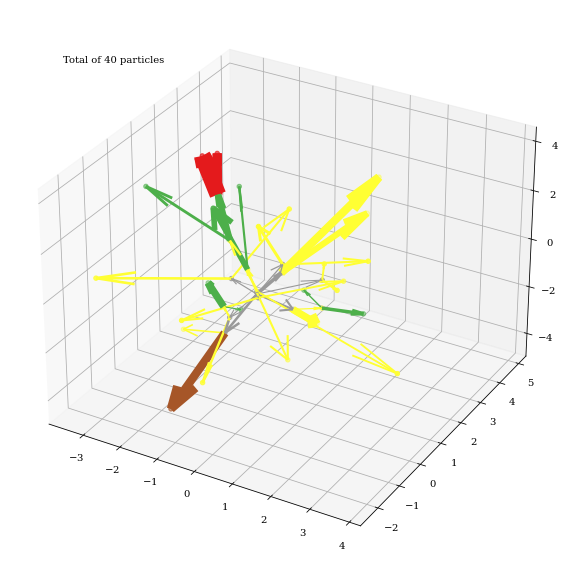

In [14]:
np.random.seed(123456)
s0, s, p = solution(tmax=5)
visualize(s0,s,p)

Samlet set er vores anden løsning lidt længere end den første, men hver enkelt del er lille (cirka 5 linjer i snit)  og nem at overskue.  Desuden bliver vores endelige funktion langt mere ekspresiv idet vi nemt kan aflæse vores løsningsmodel fra den. 

Overall, our second solution is slightly longer than the first, but each part is small (about 5 lines in section) and easy to understand. Furthermore, our final function becomes much more expressive as we can easily read our solutionmodel from it.

## Opsummering

- Den din løsningsmodel op i mindre kodebider 
  - Helst ikke mere en 30 linjer, optimalt 3-10 linjer 
- Isolerér funktionalitet der bliver brugt gentagende gange 
  - Hvis der en smule variation, så prøv at indkapsle det i et mere generelt stykke kode

## Summary

- Split your solution into smaller code pieces
  - Preferably no more than 30 lines, optimally 3-10 lines
- Isolate functionality that is used repeatedly
  - If there is a bit of variation, try to encapsulate it in a more general piece of code

# Validering

# Validation

Validering af en løsningsmodel er et komplekst spørgsmål som ikke har ét bestemt svar.  Her vil vi bruge at vi opdeler vores kode i mindre bidder og validerer hver bid for sig.

Validation of a solution to a problem is a complex issue that does not have a simple, single answer. Here we will use that we have split our code into smaller chunks and validate each bite separately.

## Validering af mindre bidder 

Ovenover så vi at der var en række fordele ved at opdele vores kode i mindre bidder, blandt andet at det er nemmere at overskue et mindre stykke kode end det er at overskue mange linjer kode.  Hvis vi kombinerer dette med _validering_ af disse mindre stykker kode kan vi være mere sikre på at vores kode faktisk virker efter hensigten. 

Validering af små stykker kode foregår typisk ved at vi giver nogle kendte argumenter og tester om vi får det forventet svar tilbage. 

## Validation of smaller chunks

Above we saw that there were a number of advantages to dividing our code into smaller chunks, among other things that it is easier get a clear overview of a smaller piece of code. If we combine this with _validation_ of these smaller pieces of code, we can be more certain that our code actually works as intended.

Validation of small pieces of code is typically done by giving some known arguments and tests whether we get the expected answer back.

### Eksempel: Validering af `direction` 

Ovenover definerede vi funktionen `direction` som skal give os $n$ enhedsvektorer fordelt på en kugle.  Lad os teste at funktionen faktisk gør som vi forventer.  Vi vil teste om 

- Vi får $n$ vektorer tilbage 
- At længden af hver vektor er (tæt på) 1

### Example: `direction` validation

Above, we defined the `direction` function to give us $n$ unit vectors distributed on a sphere. Let us test that the function actually does what we expect. We will test if

- We get $n$ vectors back
- The length of each vector is (close to) 1

In [15]:
def testDirection():
    def one(n):
        v = direction(n)
        assert len(v) == n
        assert np.allclose(np.linalg.norm(v,axis=1),1)
    one(1)
    one(10)
    one(100)
    
testDirection()

Funktionen ovenover definerer en underfunktion for at teste for forskellige $n$ og vi tester derefter for $n=1,10$ og $100$. Da der _ikke_ opstår nogen fejl undervejs ser vi at `direction` faktisk opfylde de to kriterier ovenover. 

The function above defines a sub-function to test for different $n$ and then we test for $n=1,10$ and $100$. We see that `direction` actually meets the two criteria above since _no_ errors are produced.

## Validering af alle (væsentlige) egenskaber

I vores eksempel i det forgående afsnit testede vi at `direction` faktisk 

- giver os $n$ vektorer tilbage 
- for hver vektor $\vec v$ at $|\vec v|=1$ 

Men vi har _ikke_ tjekket at det retureneret vektorer faktisk fordeler sig på en kugleskal. Vi kan derfor _ikke_ være sikre på at funktionen `direction` faktisk gør som vi forventer.  

Det er vigtigt når vi implementerer vores test af koden at vi faktisk tjekker _alle væsentlige_ egenskaber ved vores kode, og ikke kun det mest oplagte.  Det indbefatter _også_ at vi tjekker om vores kode _fejler_ på en forudsiglig måde hvis vi bruger koden på en måde som ikke er tilsigtet. 

## Validation of all (essential) properties

In our example in the previous section we tested that `direction` in fact

- returns us $n$ vectors
- for each vector $\vec v$ at $|\vec v|=1$

But we have _not_ checked that the retrieved vectors are in fact distributed on a sphere. We can therefore _not_ be sure that the `direction` function does what we expect.

It is important when we implement our test of code that we actually check _all essential_ properties of our code and not just the most obvious. That _also_ includes checking if our code _fails_ in a predictable way if we use the code in a non-intended manner.

### Eksempel: Mere validering af `direction`

Udover at teste om `direction` faktisk giver $n$ enhedsvektorer tilbage vil vi gerne teste om disse faktisk fordeler sig på en kugleskal.  Det vil vi gøre ved at bestemme vinklerne $\vartheta$ og $\varphi$ for hver vektor og tjekke om disse er jævnt fordelt.  Vi bruger funktionen `scipy.stats.kstest` ([Kolmogorov–Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)) for at tjekke om vinklerne er jævnt fordelt.  Desuden vil vi tjekke at funktionen `direction` fejler hvis vi giver et negativt antal vektorer ($n<0$).

### Example: More validation of `direction`

In addition to testing whether `direction` actually returns $n$ unit vectors, we would like to test whether these actually distribute on a sphere. We will do this by determining the angles $\vartheta$ and $\varphi$ for each vector and checking whether these are evenly distributed. We use the `scipy.stats.kstest` function ([Kolmogorov – Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)) to check if the angles are evenly distributed. In addition, we will check that the `direction` function fails if we give a negative number of vectors ($n<0$).

In [16]:
def testDirection():
    def test_size(n):
        v = direction(n)
        assert len(v)==n, "Got {} vectors, expected {}".format(len(v),n)
        
    def test_unit(n):
        v = direction(n)
        assert np.allclose(np.linalg.norm(v,axis=1),1),\
            "Not all vectors are unitvectors"
            
    def test_sphere(n):
        v = direction(n)
        r = np.linalg.norm(v,axis=1)
        theta = np.arccos(v[:,2]/r)
        phi = np.arctan2(v[:,1],v[:,0])
        kstheta,_ = sp.stats.kstest(theta,'uniform',(0,np.pi))
        ksphi,_ = sp.stats.kstest(phi,'uniform',(-np.pi,2*np.pi))
        assert kstheta < 0.07, "Theta not uniformly distributed"
        assert ksphi < 0.07, "Phi not uniformly distributed"

    try:
        test_size(-1)
    except: 
        pass 
    else:
        raise AssertionError('direction does not fail on negative length')
        
    test_size(1)
    test_size(10)
    test_size(100)
    test_unit(100)
    test_sphere(1000)
    
testDirection()

Vi har nu en rimelig komplet test af vores funktion `direction` som tester at 

- vi får $n$ enhedsvektorer, 
- vektorene fordeler sig på en kugleskal, og sidst men ikke mindst 
- fejler hvis vi giver et negativt argument. 

We now have a reasonable complete test of our function `direction` which tests that

- we get $n$ unit vectors,
- The vectors are distributed on a sphere, and last but not least
- fails if we give a negative argument.

## Pythons `unittest` værktøj 

Python tilbyder modulet [`unittest`](https://docs.python.org/3/library/unittest.html) til at implementerer validering af kode.  Navnet _unit test_ ('enhedstest') kommer af vi laver test på hver enkelt _unit_ eller kodebid.  Værktøjet bruger en _Objekt Orienteret_ tilgang til at lave vores validering.  Pointen er man laver en _klasse_ der test noget kode, og denne klasse _arver_ fra `unitest.TestCase`, mens hver enkelt test er implementeret i _metoder_ som har navne der starter med `test`. 

Vi kan lave flere af disse klasser og kombinerer dem til en samlet test af hele vores løsning.  Det vil vi se lidt senere. 

## Python's `unitest` tool

Python offers the [`unittest`](https://docs.python.org/3/library/unittest.html)  module to implement code validation. The name _unit test_ comes from the fact that we do tests on each _unit_ or code bit. The tool uses an _Object Oriented_ approach to make our validation. The point is to create a _class_ that tests some code, and this class _inherits_ from `unitest.TestCase`, while each test is implemented in _methods_ having names starting with `test`.

We can make several of these classes and combine them into an overall test of our entire solution. We'll see that later.

### Eksempel: Validering af `direction` med brug af `unittest`

Lad os omskrive vores valideringskode ovenover til en klasse der arver fra `unittest.TestCase`, så vi kan bruge `unittest` værktøjet.  Først importerer vi værktøjet.

### Example: `direction` validation using `unittest`

Let's rewrite our validation code above as a class that inherits from `unittest.TestCase` so we can use the `unittest` tool. First we import the tool.

In [17]:
import unittest

Nu laver vi så vores klasse og implementerer hver test som en metode (en funktion i klassen)

Now we make our class and implement each test as a method (a function in the class)

In [18]:
class TestDirection(unittest.TestCase):
    def test_size(self):
        for n in [1,10,100]:
            v = direction(n)
            self.assertEqual(n,len(v))
    
    def test_negative(self):
        with self.assertRaises(ValueError):
            direction(-1)
            
    def test_unit(self,n=100):
        v = direction(n)
        self.assertTrue(np.allclose(1,np.linalg.norm(v,axis=1)))
        
    def test_sphere(self,n=1000):
        v = direction(n)
        r = np.linalg.norm(v,axis=1)
        theta = np.arccos(v[:,2]/r)
        phi = np.arctan2(v[:,1],v[:,0])
        kstheta,_ = sp.stats.kstest(theta,'uniform',(0,np.pi))
        ksphi,_ = sp.stats.kstest(phi,'uniform',(-np.pi,2*np.pi))
        self.assertLess(kstheta, 0.07)
        self.assertLess(ksphi, 0.07)
        
    def runTest(self):
        self.test_size()
        self.test_negative()
        self.test_unit()
        self.test_sphere()

Lad os kører denne test 

Let us run this test

In [19]:
unittest.TextTestRunner().run(TestDirection())

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Test af input former

Nogle gange laver vi funktioner som kan tage flere slags argumenter.  I det tilfælde bør vi sikre os at vores kode giver det forventet svar tilbage (eller fejler på en forudsiglig måde) alt efter hvilket slag argumenter vi har givet. 

## Test of input forms

Sometimes we make functions that can take several kinds of arguments. In that case, we should make sure our code returns the expected response (or fails in a predictable way) according to the type of argument we have passed.

### Eksempel: Validering af `norm`

Ovenover har vi defineret funktionen `norm` sådan at den kan både tage en enkelt fir-vektor, eller en liste af fir-vektorer.   Lad os lave en test af denne funktion og se at funktionen i alle tilfælde giver os meningsfuldt output.  Vi vil også teste at funktionen faktisk giver os det tilbage vi forventer. 

I den første test tjekker vi at normen er lig med massen $m$ for en enkelt vektor, mens den anden test gør det samme for mange vektorer.  

### Example: Validation of `norm`

Above, we have defined the function `norm` so that it can both take a single four-vector, or a list of four-vectors. Let us do a test of this function and see that the function in all cases gives us meaningful output. We also want to test that the function actually gives us the back we expect.

In the first test, we check that the norm is equal to the mass $m$ for a single vector, while the second test does the same for many vectors.

In [20]:
class TestNorm(unittest.TestCase):
    def test_calc(self):
        for _ in range(100):
            m = np.random.random()
            p = np.random.random()
            u = np.array([np.sqrt(m**2+p**2), p, 0, 0])
            self.assertAlmostEqual(norm(u),m)
            
    def test_array(self):
        n = 100
        m = np.random.random((n,1))
        p = np.random.random((n,1))
        z = np.zeros((n,1))
        u = np.hstack((np.sqrt(m**2+p**2), 
                       p, 
                       z,
                       z))
        M = norm(u)
        for mm, MM in zip(m[:,0],M):
            self.assertAlmostEqual(mm,MM)
            
    def runTest(self):
        self.test_calc()
        self.test_array()

unittest.TextTestRunner().run(TestNorm())

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Tilfældige tal og validering

Hvis vi bruger tilfældige tal i vores løsning skal vi være ekstra omhyggelige med at tjekke koden.  Tilfældige tal er - tilfældige - hvilket betyder vi ikke altid ved hvilke størrelser vi laver beregninger på, og vi derfor nemt kan komme få tal som er _uheldige_ i forhold til det vi beregner. 

## Random numbers and validation

If we use random numbers in our solution, we need to be extra careful about checking the code. Random numbers are - well, random - which we means we do not always know the values on which we do calculations. We can therefore  easily get few numbers that are _unlucky_ for our calculations.

### Eksempel: Validering af `initialize` 

I funktionen `initialize` laver vi en række start impulser ved at trække tilfældige til fra fordelingen 

$$
f_{E}(v) = \lambda e^{\lambda v}\quad\mbox{med}\ \lambda=1\quad.
$$

Denne fordeling har understøttelse i hele $\mathbb{R}^+$ hvilket betyder at vi i _princippet_ kan trække tilfældige impulser der er meget store, så vi vil sikre os vi ikke får over-lyshastigheder. 

Når nu vi er i gang med at validerer `initialize` kan vi lige så godt også indfører et par andre tjek. 

### Example: `initialize` validation

In the `initialize` function we make a number of start momenta by sampling at random from the distribution

$$
f_{E}(v) = \lambda e^{\lambda v}\quad\mbox{med}\ \lambda=1\quad.
$$

This distribution has support in whole $\mathbb{R}^+$ which means that in the _principle_ we can draw random momenta that are very large. Thus we want to ensure we do not get speeds that are larger than the speed of light.

We will also introduce a couple of other checks now that we're validating `initialize`. 

In [21]:
class TestInitialize(unittest.TestCase):
    def test_size(self):
        for n in [1,10,30]:
            s, p, a = initialize(n)
            self.assertEqual(n,len(s))
            self.assertEqual(n,len(p))
            self.assertEqual(n,len(a))
            
    def test_tachyons(self):
        for n in [3, 10, 20]:
            s, p, a = initialize(n)
            m = norm(p)
            g = p[:,0]/m
            for pp,mm,gg in zip(p,m,g):
                v = pp[1:]/mm/gg
                nv = np.linalg.norm(v)
                self.assertLess(nv,1)
                
    def test_negative(self):
        with self.assertRaises(ValueError):
            initialize(-1)
    
    def runTest(self):
        self.test_size()
        self.test_negative()
        self.test_tachyons()

unittest.TextTestRunner().run(TestInitialize())

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

Vi ser at sandsynligheden for at få hastigheder større end eller lig med 1 er _meget_ små, så vi behøver ikke at indfører ekstra tjek i `initialize`.   

We see that the probability of getting speeds greater than or equal to 1 is _very_ small, so we do not need to introduce extra checks in `initialize`.

## Brug af anden viden i validering

Vores kodebidder indkoder ofte specifikke begreber som vi har anden viden om end det vi har indkodet.  Det kan for eksempel være viden om bevarelsessætninger eller andet fysisk viden.  Den slags viden er fuldstændig essentiel når vi laver validering af vores kode: Hvis koden ikke lever op til for vores forventninger løser den ikke problemet. 

## Using other knowledge in validation

Our code chunks often encode specific concepts of which we have other knowledge than what we have encoded. It may, for example, be knowledge of conservation laws or other physical knowledge. This kind of knowledge is absolutely essential when we validate our code: If the code does not meet our expectations, it does not solve the problem.

### Eksempel: Validering af `transform`

Vores funktion `transform` udfører en Lorentztransformation af fir-vektoren $\vec u'$ fra en reference ramme $F'$ til rammen $F$, hvor $F'$ bevæger sig med hastigheden $\vec v$ i forhold til $F$. 

$$ \tilde u'\xrightarrow[\vec v]{F'\rightarrow F} \tilde u\quad.$$

Vi forventer at den modsatte transformation, altså af $\tilde u$ i referencerammen $F$ ind i rammen $F'$ giver os $\tilde u'$

$$ \tilde u\xrightarrow[-\vec v]{F \rightarrow F'}\tilde u'\quad.$$

Desuden forventer vi at transformation aldrig resulterer i tachyoner (over-lyshastighedshed partikler, eller $|\vec u|,|\vec u'| > 1$).  

I vores implementation af `transform` har vi implicit antaget at $\vec v\neq0$, så lad os teste at vi får noget galt i det tilfælde.   På anden side, hvis $\vec u'=0$ forventer vi at $\vec u=v$, hvilket vi også tester. 

Lad os teste om vores kode overholder disse antagelser 

### Example: `Transform` validation

Our function `transform` performs a Lorentz transformation on the four-vector $\vec u'$ from a reference frame $F'$ to the $F$ frame, where $F'$ moves with the velocity $\vec v$ relative to $F$.

$$ \tilde u'\xrightarrow[\vec v]{F'\rightarrow F} \tilde u\quad.$$

We expect that the opposite transformation i.e., $\tilde u$ in the reference frame $F$ into the frame $F'$ gives us $\tilde u'$

$$ \tilde u\xrightarrow[-\vec v]{F \rightarrow F'}\tilde u'\quad.$$

Furthermore, we expect that transformation never results in tachyons (over-lightspeed velocity particles, or $|\vec u|,|\vec u'| > 1$).

In our implementation of `transform` we implicitly assumed that $\vec v\neq0$, so let's test that we get something wrong in that case. On the other hand, if $\vec u'=0$ we expect $\vec u=v$, which we also test.

Let's test if our code complies with these assumptions

In [22]:
class TestTransform(unittest.TestCase):
    def makeUV(self,nv,nu):
        vs = direction(2)
        up = np.array([np.sqrt(1+nu**2), *(nu * vs[0])])
        v  = np.array([np.sqrt(1+nv**2), *(nv * vs[1])])
        return up, v
        
    def test_reverse(self):
        for _ in range(100):
            up, v = self.makeUV(*np.random.random(2))
            vp = v.copy()
            vp[1:] *= -1
            u  = transform(up,v)
            uu = transform(u,vp)
            self.assertTrue(np.allclose(up,uu))
        
    def test_tachyon(self):
        for nv in np.random.uniform(0,.99,size=100):
            up, v = self.makeUV(nv,np.random.random())
            u = transform(up, v)
            m = norm(u)
            self.assertNotAlmostEqual(m,0,
                                      msg='We got Tachyons: m='.format(m))
            g = u[0]/m
            uv = u[1:]/g/m
            self.assertLess(np.linalg.norm(uv),1,
                            'We got Tachyons!')
            
            
    def test_null(self):
        up, v = self.makeUV(0,np.random.random())
        u  = transform(up,v)
        self.assertTrue(np.allclose(u,up))
        
    def test_zero(self):
        up, v = self.makeUV(np.random.random(),0)
        u  = transform(up,v)
        self.assertTrue(np.allclose(u,v))
    
    def runTest(self):
        # self.test_reverse()
        # self.test_tachyon()
        self.test_null()
        # self.test_zero()
unittest.TextTestRunner().run(TestTransform())
# help(unittest.TestCase.assertNotAlmostEqual)

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

Som vi kan se virker vores funktion `transform` efter hensigten.  Hvis vi havde givet `v` i stedet for `-v` i det andet kald til `transform` i metoden `test_reverse` ville vi se at testen fejlede.  Advarslen `invalid value encountered in true_divide` kommer fra kaldet til `igamma` i `transform` kaldt i `test_null` og er helt forventeligt.  

We see that our function `transform` works as intended. If we had given `v` instead of` -v` in the second call to `transform` in the` test _reverse` method, we would see that the test failed. The warning `invalid value encountered in true_ divide` comes from the call to `igamma` in `transform` called in` test_null` and is quite expected.

### Eksempel: Validering af `decay`

Ovenover har vi testet de _essentielle_ funktioner `direction`, `norm` og `transform`.  Den sidste særlig vigtige funktion vi mangler at validerer er `decay`.  Denne funktion skal beregne et henfald af en partikel fir-impuls $\tilde p$ til to andre partikler, med fir-impulserne $\tilde p_1$ og $\tilde p_2$ i laboratoriesystemet. 

Fra relativistisk mekanik ved vi at den [_invariante masse_](https://en.wikipedia.org/wiki/Invariant_mass)

\begin{align*}
m^2 &= (E_1+E_2)^2 - |\vec p_1 + \vec p_2|^2\\
|\tilde p| &= |\tilde p_1 + \tilde p_2|\quad,
\end{align*}

er bevaret.  Det vil vi tjekke er overholdt af vores funktion `decay`. 

Desuden ved vi også at impulsen skal være bevaret i henfaldet 

$$
\vec p = \vec p_1 + \vec p_2\quad,
$$ 

så vi vil ligeledes teste for det. 

Endelig kan vi også teste at de positioner vi får tilbage er som forventet. 

Vi ved fra ovenover at `transform` fejler hvis partiklen der henfalder ligger stille, så det vil vi ikke teste for.  Vi ved også at `transform` aldrig giver os tachyoner, så det tilfælde behøver vi heller ikke at teste for. 

### Example: `decay` validation

Above, we have tested the _essential_ functions `direction`,` norm` and `transform`. The last (but not least) important function we need to validate is `decay`. This function should calculate a decay of a particle with four-momentum $\tilde p$ to two other particles, each with the four momenta $\tilde p_1$ and $\tilde p_2$ in the laboratory system.

From relativistic mechanics we know that the [_invariant mass_](https://en.wikipedia.org/wiki/Invariant_mass)

\begin{align*}
m^2 &= (E_1+E_2)^2 - |\vec p_1 + \vec p_2|^2\\
|\tilde p| &= |\tilde p_1 + \tilde p_2|\quad,
\end{align*}

is preserved. We will check that is fulfilled by our function `decay`.

Moreover, we also know that the momentum must be preserved in the decay

$$
\vec p = \vec p_1 + \vec p_2\quad,
$$

so we will also test for that.

Finally, we can also test that the positions we get back are as expected.

We know from above that `transform` fails if the particle that decays is not moving, so we will not test for that. We also know that `transform` never gives us tachyons, so we do not have to test for that either.

In [23]:
class TestDecay(unittest.TestCase):
    def makeP(self):
        p = np.random.exponential()*direction()[0]
        m = 1/np.random.choice([1,4,16])
        return np.array([np.sqrt(m**2+(p**2).sum()),*p])
    
    def makeS(self):
        s = np.random.random()*direction()[0]
        return np.array([1,*s])
    
    def test_invariantMass(self):
        for _ in range(100):
            p = self.makeP()
            _, _, p1, p2 = decay(np.zeros(4),p)
            m = norm(p)
            M = norm(p1+p2)
            self.assertAlmostEqual(m,M)
            
    def test_momentum(self):
        for _ in range(100):
            p = self.makeP()
            _, _, p1, p2 = decay(np.zeros(4),p)
            q = p1[1:] + p2[1:]
            self.assertTrue(np.allclose(q, p[1:]))
            
    def test_position(self):
        for _ in range(100):
            p = self.makeP()
            s = self.makeS()
            s1, s2, _, _ = decay(s,p)
            self.assertTrue(np.allclose(s1[1:],s[1:]))
            self.assertTrue(np.allclose(s2[1:],s[1:]))
        
    def runTest(self):
        self.test_invariantMass()
        self.test_momentum()
        self.test_position()
        
unittest.TextTestRunner().run(TestDecay())

.
----------------------------------------------------------------------
Ran 1 test in 0.179s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

I vores validering af `decay` har vi i høj grad gjort brug af vores eksterne viden fra relativistisk mekanik, og vi har fundet at vores kode lever op til vores forventinger.

In our validation of `decay` we have made extensive use of our external knowledge from relativistic mechanics, and we have found that our code meets our expectations.

## Test af hjørne tilfælde

I udvilkingen af vores løsning til problemet arbejder ofte indenfor et begrænset parameterrum.  Det vil sige, vi har ofte ganske specifikke værdier vi arbejder med.  Men vores løsning skal gerne kunne fungerer for mere generelle værdier af de parametre vi bruger.   Det er derfor vigtigt at validerer vores løsning med så mange parameterværdier som muligt - aller helst over _hele_ parameterrummet.  Det er dog ofte svært at teste _hele_ rummet så vi kan derfor koncentrerer vores validering omkring hjørnetilfælde eller særligt kritiske værdier. 

I vores validering kan det være at vi finder at der er dele af parameterrummet som vi ikke kan lave en løsning for.  I det tilfælde bør vi gå tilbage og indfører særlige forholdsregler for disse dele af parameterrummet - i sidste ende eventuelt give op for den del af parameterrummet.

## Test of corner cases

In the development of our solution to the problem we find that we often work within a limited parameter space. That is, we often have quite specific values we work with. But our solution should be able to work for more general values of the parameters we use. It is therefore important to validate our solution with as many parameter values as possible - preferably over _the entire_ parameter space. However, it is often difficult to test _the entire_ space and we can therefore concentrate on validation in corner cases or particularly critical values.

In our validation, we may find that there are parts of the parameter space in which we cannot make a solution. In that case, we should go back and introduce special precautions for those parts of the parameter space - eventually giving up that part of the parameter space.

### Eksempel: Validering af `update` 

Funktionen `update` propagerer en partikel med fir-impulsen $\tilde p$ og stedet $\vec s$ frem til en nyt sted $\vec s'$ ved 

$$\vec s' = \vec s + \Delta t\vec v\quad,$$

hvor $\Delta t$ er længden (i tid) af hvert skridt, og 

$$\vec v = \frac{\vec p}{m\gamma}\quad.$$

Det skulle gerne være sådan at $\vec s'$ bliver beregnet korrekt uafhængigt af $\Delta t$. 

Funktionen afgøre også om partiklen henfalder ved at sammenligne et tilfældigt tal $r$ med henfaldssandsynligheden,

$$P(\mathrm{decay}) = \Delta t' \lambda = \frac{\Delta t}{\gamma} \frac{\log(2)}{\tau}\quad,$$

hvor vi sætter $\tau=1/m$.  Det skulle gerne være sådan at efter et givent tidsinterval $t_1$ at vi har _cirka_ lige mange henfald uafhængigt af skridtlængden $\Delta t$'s størrelse.  Det _forventet_ antal henfald er over tiden $t_1$ er da 

$$\operatorname E[\mathrm{decay}] = \frac{t}{\gamma} m \log(2)\quad.$$

Det er dog klart at i hjørnetilfælde som for eksempel $\Delta t=t_1$ eller $\Delta t=t_1/2$ at vi _ikke_ kan forvente at denne betingelse er opfyldt - vi har ikke nok forsøg til at få partiklen til at henfalde.  Vi vil se hvad der sker i den slag hjørne tilfælde. 

Måden vi tester dette på er ved at for et given $\Delta t=t_1/n$ se hvor mange henfald vi finder over tiden $t_1$.  Vi gentager forsøget $m$ gange og udregner det gennemsnitlige antal henfald $\bar d$, samt den statistiske usikkerhed på gennemsnittet $\delta_d = \sigma_d/\sqrt{m}$.  Vi tjekker da om gennemsnittet er sammenlignligt med forventingen. 

### Example: `update` validation

The `update` function propagates a particle with the four-momentum $\tilde p$ and the location $\vec s$ forward to a new location $\vec s'$ at

$$\vec s' = \vec s + \Delta t\vec v\quad,$$

where $\Delta t$ is the length (in time) of each step, and

$$\vec v = \frac{\vec p}{m\gamma}\quad.$$

We want that $\vec s'$ is calculated correctly independently of $\Delta t$.

The function also determines whether the particle decays by comparing a random number of $r$ with the decay probability,

$$P(\mathrm{decay}) = \Delta t' \lambda = \frac{\Delta t}{\gamma} \frac{\log(2)}{\tau}\quad,$$

where we put $\tau=1/m$. It should be such that after a given time interval $t_1$ we have _roughly_ the same number of decays irrespective of the value of the step length $\Delta t$. The _expected_ number of decays over time $t_1$ is

$$\operatorname E[\mathrm{decay}] = \frac{t}{\gamma} m \log(2)\quad.$$

However, it is clear that in corner cases such as $\Delta t=t_1$ or $\Delta t=t_1/2$, we _cannot_ expect this condition to be met - we do not have enough attempts to cause the particle to decay. We will see what happens in that kind of corner case.

The way we test this is for a given $\Delta t=t_1/n$ to see how many decays we find over time $t_1$. We repeat the test $m$ times and calculate the average number of decay $\bar d$, as well as the statistical uncertainty of the average $\delta_d = \sigma_d/\sqrt{m}$. We check if the average is comparable to the expectation.

In [24]:
class TestUpdate(unittest.TestCase):
    def makePV(self):
        v  = np.random.random()*direction()[0]
        v2 = (v**2).sum()
        g  = 1/np.sqrt(1-v2)
        m  = 1
        p  = np.array([np.sqrt(m**2 + m**2*g**2*v2),*(m*g*v)])
        return p,v
    
    def test_propagate(self):
        t   = 1
        p,v = self.makePV()
        s0  = np.zeros(4)
        s1  = s0[1:] + t * v
        for n in [4, 10, 100, 1000]:
            s  = s0.copy()
            dt = t / n
            tt = 0
            for _ in range(n):
                s, _ = update(s,p,dt)
                tt += dt
            
            self.assertTrue(np.allclose(s1,s[1:]))
            self.assertAlmostEqual(t,s[0])
            
    def test_decayed(self):
        t    = 1
        p, _ = self.makePV()
        s    = np.zeros(4)
        m    = norm(p)
        g    = p[0] / m
        e    = t / g * m * np.log(2)
        oe   = round(np.log10(e),2)
        for n in [1, 2, 10, 100]:
            
            with self.subTest(n=n):
                m = 100
                dt = t/n
                d = np.zeros(m)
                for j in range(m):
                    for _ in range(n):
                        _, decayed = update(s,p,dt)
                        if decayed:
                            d[j] += 1

                md = d.mean()
                ed = d.std()/np.sqrt(len(d))
                x  = 2 if n > 2 else 3
                self.assertTrue(md-x*ed < e < md+x*ed,
                               "Expected {:.3f}, got {:.3f}+/-{:.3f}"
                               .format(e,md,ed))
                    
    def runTest(self):
        self.test_propagate()
        self.test_decayed()
        
unittest.TextTestRunner().run(TestUpdate())


FAIL: runTest (__main__.TestUpdate) (n=10)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_455110/534464235.py", line 49, in test_decayed
    self.assertTrue(md-x*ed < e < md+x*ed,
AssertionError: False is not true : Expected 0.583, got 0.430+/-0.062

----------------------------------------------------------------------
Ran 1 test in 0.455s

FAILED (failures=1)


<unittest.runner.TextTestResult run=1 errors=0 failures=1>

Bemærk at vi laver vores test i `test_decayed` i en `subTest` kontekst så vi kan se hvornår testen fejler. Vi kan nemlig ikke lave en rigid test her - hvor mange henfald vi har afhænger i høj grad af hvilke tilfældige tal vi trækker. 

Note that in `test_decayed`  a `subTest` context so we can see when the test fails. We cannot do a rigid test here - how many decay we have depends largely on what random numbers we draw.

## Validering af visualisering 

Det er praktisk talt umuligt at lave hård validering af visualisering.  I sidste ende handler det ofte om hvordan det ser ud for modtageren.  Vi kan dog stille nogle spørgsmål som kan hjælpe os med at gøre vores visualisering så god som mulig: 

- Er visualiseringen nem at forstå uden alt for meget beskrivelse? 
- Er forskellige dele forklaret i en tegnforklaring eller lignende? 
- Hvis vores visualisering er tre-dimensionel, er der da en to-dimensionel repræsentation der lige så godt illusterer pointen? 
- Er alle akser og lignene benævnt? 

Vores visualisering ovenover lever _ikke_ op til de krav.  Her har vi koncentreret os om at lave overskuelig kode og at lave gode visualiseringer kræver ofte en del (spagetti-) kode. 

## Validation of visualization

It is virtually impossible to make hard validation of visualization. In the end, it is often about how it looks to the recipient. We can, however, ask some questions that can help us make our visualization as good as possible:

- Is the visualization easy to understand without too much explanation?
- Are different parts explained in a legend or the like?
- If our visualization is three-dimensional, is there a two-dimensional representation that just as well illustrates the point?
- Are all axes and the like named?

Our visualization above does _not_ live up to the requirements. Here we have concentrated on making clear code and making good visualizations often requires a lot of (spaghetti) code.

## Samlet validering 

Ovenover har vi hovedsagligt fokuseret på at validerer små bidder af vores løsning.  I nogle tilfælde (for eksempel for `transform` og `decay`) har vi forladt os på at andre bidder allerede var valideret.  Ved at validerer de enkelte bidder har vi opbygget tillid til at de gør som forventet, og vi kan derfor være nogenlunde trygge ved den samlet løsning, uden egentlig at have valideret den samlet løsning. 

Men i sidste ende der er vi interesseret i at validerer _hele_ løsningen - og ikke have alt for blind tro på at når de mindre bidder virker så virker helheden også.   Med mindre det problem vi står overfor har specifikke løsninger, så må vi ofte bruge _statistiske_ test for at validerer vores løsning - særlig hvis vores løsning forlader sig på tilfældige tal eller lignende.  

Vi kan også bruge anden viden til at validerer vores endelige løsning.  Simulerer vi for eksempel stjerne dannelse fra en sky af interstellart støv er det rimeligt at vores model nogenlunde reproducere kendte resultater.  

Som nævnt tidligere tilbyder Python modulet `unittest` at vi kører mange test på en gang.  Lad os bruge vores test fra ovenover til at illusterer det med 

## Total validation

Above, we have mainly focused on validating small chunks of our solution. In some cases (for example for `transform` and `decay`), we have left other bits already validated. By validating the individual bits, we have built confidence that they do as expected, and we can therefore be fairly confident about the overall solution, without actually having validated the overall solution.

But in the end we are interested in validating the _whole_ solution - and not trust too much that if the smaller bits work then the whole also works. Unless the problem we are facing has specific solutions, we often have to use _statistical_ tests to validate our solution - especially if our solution relies on random numbers or the like.

We can also use other knowledge to validate our final solution. For example, if we simulate star formation from a cloud of interstellar dust, it is reasonable for our model to reproduce known results.

As mentioned earlier, the Python module offers `unittest` that we run many tests at once. Let's use our test from above to illustrate it

### Eksempel: Fuld validering af henfald af partikler. 

Vi vil bruge vores test tilfælde 

- `TestDirection`, 
- `TestNorm`, 
- `TestInitialize`, 
- `TestTransform`, 
- `TestDecay` og 
- `TestUpdate` 

til at teste vores simulering af partikel henfald.

### Example: Full validation of decay of particles.

We will use our test cases

- `TestDirection`,
- `TestNorm`,
- `TestInitialize`,
- `TestTransform`,
- `TestDecay`, and
- `TestUpdate`

to test our simulation of particle decay.

Vi starter med at lave en `TestSuite` som vi så ligger vores specifikke test til

We start by making a `TestSuite` which we add our specific test to

In [25]:
suite = unittest.TestSuite()
suite.addTest(TestDirection())
suite.addTest(TestNorm())
suite.addTest(TestInitialize())
suite.addTest(TestTransform())
suite.addTest(TestDecay())
suite.addTest(TestUpdate())

Vi kan nu afvikle hele denne suite af test i et hug

We can now execute the whole suite of tests in one go

In [26]:
unittest.TextTestRunner(verbosity=100).run(suite)

runTest (__main__.TestDirection) ... ok
runTest (__main__.TestNorm) ... ok
runTest (__main__.TestInitialize) ... ok
runTest (__main__.TestTransform) ... ok
runTest (__main__.TestDecay) ... ok
runTest (__main__.TestUpdate) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.367s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Opsummering 

- Lav test af din kodestykker 
  - Brug værktøjer som f.eks. `unittest` 
- Test at koden opfylder betingelser 
- Test at koden fejler som forventet 
- Test randtilfælde 

## Summary

- Test your code snippets
  - Use tools such as `unittest`
- Test that the code meets the conditions
- Test that the code fails as expected
- Test edge cases

# Vid hvilken data du arbejder med

# Know what data you are working on 

Vi kan meget nemt komme til at have en masse data i vores kode som ligger og flyder rundt og potentielt kan komme til at give overraskende eller enda forkerte resultater.  En måde at undgå det på er ved at begrænse adgangen til data.  Det kan gøres på flere forskellige måder

- Ved hjælp af funktioner der indkapsler data
- Ved hjælp af _objekt-orienteret_ teknikker 

We can very easily get a lot of data in our code that is floating around and potentially giving surprising or even wrong results. One way to avoid this is by limiting access to data. It can be done in several different ways

- Using functions to encapsulate data
- Using _object-oriented_ techniques

## Eksempel: Adgang til data via en funktion

Vi vil starte med at kigge på den første måde.  Lad os sige vi har noget data i en fil som vi vil undersøge.  Måden vi vil begrænse adgangen til den data er ved at lave en funktion der returnerer data.  Lad os antage vi har filen `data.dat` med indholdet 

## Example: Accessing data via a function

We will start by looking at the first method. Assume say we have some data in a file that we want to investigate. The way we want to restrict access to that data is by creating a function that returns data. Suppose we have the file `data.dat` with the following content

In [27]:
def genTxtFile(filename,sep='\t'):
    txtdata = [[10,  8.04],
               [ 8,  6.95],
               [13,  7.58],
               [ 9,  8.81],
               [11,  8.33],
               [14,  9.96],
               [ 6,  7.24],
               [ 4,  4.26], 
               [12, 10.84],
               [ 7,  4.82],
               [ 5,  5.68]]
    txt = '\n'.join([',\t'.join([str(x),str(y)]) for x,y in txtdata])
    # txt = '\n'.join([[','.join([str(x),str(y)]) for x,y in l] for l in txtdata])
    with open(filename,'w') as file:
        print(txt,file=file)
    print(txt)
genTxtFile('data.dat')
hide_toggle()

10,	8.04
8,	6.95
13,	7.58
9,	8.81
11,	8.33
14,	9.96
6,	7.24
4,	4.26
12,	10.84
7,	4.82
5,	5.68


Vi definerer funktionen `readData` som tager et filnavn eller en fil og indlæser data'en i en dataramme (engl. _array_)

We define the function `readData` which takes a file name or file and loads the data into an array

In [28]:
def readData(file):
    return np.genfromtxt(file,delimiter=',')

Når vi har brug for data'en, så kan vi kalde funktionen `readData`.   Det er fristende at kalde funktionen i starten af ens kode og gemme den læste data i en variabel `data`, og derefter lave beregninger direkte på den variabel - specielt når vi bruger et miljø som _Jupyter_ eller _Spyder_.   Den tilgang betyder dog at vores data kan tilgåes (og ændres) _alle_ steder fra, ligesom at vi kan komme til at overskrive værdien uden at vi ligger mærke til det.  Lad os sige vi vil udfører en lineær regression over vores data og derefter tegne resultatet.  Den naive måde ville være at gøre 

When we need the data, we can call the function `readData`. It is tempting to call the function at the beginning of one's code and save the read data in a variable `data` and then make calculations directly on that variable - especially when we use an environment like _Jupyter_ or _Spyder_. This approach, however, means that our data can be accessed (and changed) by _any_ place in our code, as well as that we can overwrite the value without us noticing it. Assume say we will do a linear regression over our data and then draw the result. The naive way would be

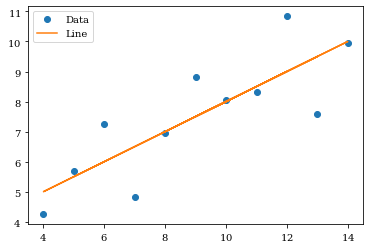

In [29]:
data = readData('data.dat')
a, b, r, p, e = sp.stats.linregress(data)
plt.plot(data[:,0],data[:,1],'o',label='Data')
plt.plot(data[:,0],a*data[:,0]+b,label='Line')
plt.legend()

Her går det fint, men hvis vi ikke lavede figuren umiddelbart efter vores lineære regression, og havde en masse kode imellem, så er det ikke svært at forestille sig at værdien af f.eks. `a` blev ændret

Here, everything is fine. However, if we did not make the figure immediately after our linear regression, and had a lot of code in between, then it is not difficult to imagine the value of eg. `a` was changed

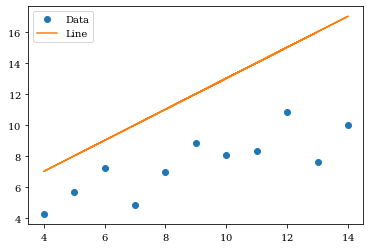

In [30]:
data = readData('data.dat')
a, b, r, p, e = sp.stats.linregress(data)
# Lots of code 
a = 1
# Lots of code
plt.plot(data[:,0],data[:,1],'o',label='Data')
plt.plot(data[:,0],a*data[:,0]+b,label='Line')
plt.legend()

For at se hvordan vi kan afhjælpe det lidt, vil skille koden ad i én del der tager sig af den lineære regression og en der laver vores graf. 

To see how we can correct it a little, we separate the code into one part that takes care of the linear regression and one that makes our graph.

In [31]:
def findLine(data):
    a, b, r, p, e = sp.stats.linregress(data)
    return data, a, b
def plotDataLine(data,a,b):
    plt.plot(data[:,0],data[:,1],'o',label='Data')
    plt.plot(data[:,0],a*data[:,0]+b,label='Line')
    plt.legend()

Indenfor hver af disse funktioner er der ingen forvirring om hvilken data vi behandler: funktionen `findLine` arbejder på argumentet `data` og give værdierne for hældningen (`a`) og konstanten (`b`) samt data tilbage, mens `plotDataLine` arbejder på `data` og liniens parametre `a` og `b`.   Vi kan sætte de sammen med

Within each of these functions, there is no confusion as to which data we process: the `findLine` function works on the `data` argument and returns the slope (`a`) and intersept (`b`) and the data, while `plotDataLine` works on `data` and the line parameters `a` and `b`. We can put these functions together

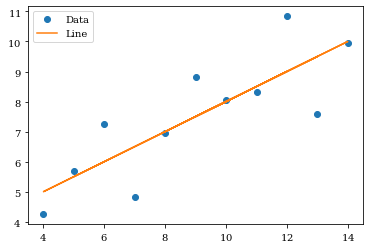

In [32]:
plotDataLine(*findLine(readData('data.dat')))

**Bemærk**: Her har vi brugt _ravel_ operatoren `*` som giver hvert element af en `tuple` som argument til en funktion. 

**Note**: Here we have used the _ravel_ operator `*` which gives each element of a `tuple` as arguments to a function.

I koden ovenover har vi _ingen_ data i det globale skopus.  Al data er indeholdt i funktionerne `readData`, `findLine` og `plotDataLine`, og der er lille risiko for at vi kommer til at lave ged i det.  Hvis vi har brug for at lave manipulationer af f.eks. `data`, så kan vi forsætte denne strategi og definerer en funktion der styre det hele (se også `solution` ovenover). 

In the code above we have _no_ data in the global scope. All data is included in the `readData`, `findLine`, and `plotDataLine` functions, and there is little risk that we will make mess of it. If we need to make manipulations of for example `data`, then we can continue this strategy and define a function that controls it all (see also `solution` above).

In [33]:
def analysis(file):
    data = readData()
    # do something to data via other functions
    _, a, b = findLine(data)
    # Possibly do some other stuff 
    plotDataLine(data,a,b)

Vi kan selvfølgelig komme til at ændre værdierne af f.eks. `a` og `b` i _Possibly do some other stuff_, men hvis vi holder os stringent til strategien ovenover kan vi minimerer risikoen. 

We can of course (accidentally) change the values `a` and` b` in _Possibly do some other stuff_, but if we stick to the strategy above, we can minimize the risk.

En anden måde at indkaplse data på er ved hjælp af objekt-orienteret programmering.  I denne tilgang definerer vi _klasser_ af objekter som alle har samme egenskaber (data) og manipulationen af disse sker udelukkende gennem metoder som klassen selv dikterer.  

Another way to encapsulate data is by object-oriented programming. In this approach, we define _classes_ of objects that all have the same properties (data) and the manipulation of these occurs solely through methods that the class itself dictates.

## Eksempel: En fir-vektor klasse 

## Example: A four-vector class

Ovenover gennemgik vi lidt om fir-vektoer

Above we briefly described four-vectors

$$ \tilde u = \begin{bmatrix}t\\\vec u\end{bmatrix}=\begin{bmatrix} u_0\\u_1\\u_2\\u_2\end{bmatrix}\quad,$$ 

med længden defineret som 

with the 'length' (or rather _norm_) defined as

$$|\tilde u| = \sqrt{u_0^2 - |\vec u|^2} = \sqrt{u_0^2-u_1^2-u_2^2-u_3^2}\quad,$$

og Lorentztransformationen fra et system $F'$ over i et andet system $F$ som bevæger sig med hastigheden $\vec v$ i forhold $F$

and the Lorentz transformation from a system $F'$ into another system $F$ which moves with the velocity $\vec v$ relative to $F$

\begin{align*}
  \tilde u &= \begin{bmatrix} 
    \gamma u_0' + \vec u'\cdot \vec v\\
    \vec u' + (\gamma - 1)\frac{\vec u'\cdot \vec v}{|\vec v|^2}\vec v + \gamma u_0'\vec v
    \end{bmatrix}\quad,
\end{align*}

hvor $\gamma=1/\sqrt{1-|\vec v|^2}$.  Lad os lave en klasse af fir-vektorer der indeholder data

where $\gamma=1/\sqrt{1-|\vec v|^2}$. Let us make a class of four-vectors that encapsulates the data.

In [34]:
class FourVector:
    def __init__(self,u0=0,u1=0,u2=0,u3=0):
        """Initialize with 4 components"""
        self._u = np.array([u0,u1,u2,u3],dtype=np.float)
    
    def norm(self):
        """Calculate norm"""
        return np.sqrt(self._u[0]**2-(self._u[1:]**2).sum())
    
    def gamma(self):
        """Calculate gamma faktor"""
        return self._u[0] / self.norm()
    
    def transform(self,v):
        """Transform from one reference frame to anoter"""
        gamma       =  1/np.sqrt(1-(v**2).sum())
        self._u[0],self._u[1:]  =  \
            gamma*(self._u[0]+np.dot(self._u[1:],v)), \
            self._u[1:] + ((gamma-1)*np.dot(self._u[1:],v)/(v**2).sum()
                            +gamma*self._u[0])*v
        return self
        
    def __getitem__(self,i):
        """Get component(s)"""
        return self._u[i]

Objekter af klassen `FourVector` ovenover indeholder de fire koordinater i variablen `self._u`, og klassen definerer metoderne `norm`, `gamma`, og `transform` for henholdvis $|\tilde u|$, $\gamma$, og en Lorentztransformation med med hastighedsvektoren $\vec v$.  Desuden tillader klassen at vi kan _læse_ hver enkelt eller flere af koordinatoer med metoden `__getitem__`.  Denne specielle metode gør at vi f.eks. kan få værdien af $u_0$ ved at skrive `u[0]`.  Vi kan dog _ikke_ tilordne en ny værdi med f.eks. `u[0]=3` da vi ikke har implementeret metoden `__setitem__`.  Klassen `FourVector` tillader altså kun ændringer til koordinatorne ved hjælp af en Lorentztransformation.  På den måde har vi sikret os at vi ikke kan lave vilkårligt om på vores fir-vektorer. 

Lad os lave en _unit-test_ på vores klasse. 

Objects of the `FourVector` class above contain the four coordinates in the variable `self. _u`, and the class defines the methods `norm`, `gamma`, and `transform` for $|\tilde u|$, $\gamma$, and a Lorentz transformation with the velocity vector $\vec v$, respectively. In addition, the class allows us to _read_ each or more of the coordinates with the method `__getitem__`. This special method means that we can get the value of $u_0$ by typing `u[0]`. However, we can _not_ assign a new value with e.g., `u[0] = 3` since we have not implemented the method `__setitem__`. The `FourVector` class thus only allows changes to the coordinators by means of a Lorentz transformation. In this way, we have ensured that we cannot arbitrarily change our four-vectors.

Let's do a _unit test_ on our class.

In [35]:
class TestFourVector(unittest.TestCase):
    def makeU(self,nu):
        """Make m=1 fourvector"""
        return FourVector(np.sqrt(1+nu**2),*self.makeV(nu))
    
    def makeV(self,nv):
        """Make direction vector of size nv"""
        return nv * direction()[0]
    
    def test_norm(self):
        """Check norm (mass) is 1"""
        for _ in range(100):
            u = self.makeU(np.random.random())
            self.assertAlmostEqual(u.norm(),1)
            
    def test_transform(self):
        """Transform and transform back and check identity"""
        for _ in range(100):
            u = self.makeU(np.random.random())
            v = self.makeV(np.random.random())
            uu = FourVector(*u[:])
            u.transform(v).transform(-v)
            self.assertTrue(np.allclose(u[:],uu[:]),
                           format('\nu={} != \nuu={} \nv={}'.
                                  format(u[:],uu[:],v)))
    
    def test_read(self):
        """Check component access"""
        r = np.random.random(4)
        u = FourVector(*r)
        self.assertTrue(np.allclose(u[:],r))
        
    def test_nowrite(self):
        """Check no write access to components"""
        u = self.makeU(np.random.random())
        with self.assertRaises(TypeError):
            u[0] = 6
    
    def runTest(self):
        self.test_norm()
        self.test_transform()
        self.test_read()
        self.test_nowrite()

unittest.TextTestRunner().run(TestFourVector())

.
----------------------------------------------------------------------
Ran 1 test in 0.064s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

Med denne fir-vektor klasse kan vi i princippet udvide vores simulation ovenover - f.eks. ved at introducerer klassen `Particle` a la 

With this four-vector class we can in principle extend our simulation above - e.g., by introducing the class `Particle` a la

In [36]:
class Particle(object):
    def __init__(self,E,px,py,pz,sx,sy,sz):
        """Initialize with 4-momentum and 3-location"""
        self._p  = FourVector(E,px,py,pz)
        self._s  = np.array([sx,sy,sz])
        self._s0 = np.array([sx,sy,sz])
        self._a  = True
        
    def decay(self):
        """Decay if not already decayed"""
        if not self._a:
            return None
        
        self._a = False
        m   = self._p.norm()
        u   = np.sqrt(3)/2*direction()[0]
        p1  = FourVector(*(1/2*m*np.array([1, *u])))
        p2  = FourVector(*(1/2*m*np.array([1, *-u])))
        return (Particle(*p1.transform(self._p[1:]/m/self.gamma())[:],*self._s), 
                Particle(*p2.transform(self._p[1:]/m/self.gamma())[:],*self._s))
    
    def step(self,dt):
        """Perform one step over dt time units"""
        if not self._a:
            return None
        
        m = self._p.norm()
        g = self._p.gamma()
        self._s += self._p[1:]/m/gamma*dt
        
        p = m / g * np.log(2)
        if np.random.random() < p*dt:
            return self.decay()
        
        return None
    
    def mass(self):
        """(Invariant) mass of particle"""
        return self._p.norm()
    
    def gamma(self):
        """Gamma faktor"""
        return self._p.gamma()
    
    def __getitem__(self,i):
        """Get components of 4-momentum and 3-location and start"""
        return np.concatenate((self._p[:],self._s,self._s0))[i]
    
    def __bool__(self):
        """Check if particle is alive or not"""
        return self._a

Denne klasser "skjuler" igen sin data - nemlig 4-impulsen, 3-stedet, og sin status, men vi kan tilgå disse ved hjælp af `p[:]`.  Vi kan nu definerer hele vores simulation i termer af objekter af denne klasse. 

This class again "hides" its data - namely the 4-momentum, the 3-location, and its status, but we can access them by means of `p[:]`. We can now define our entire simulation in terms of objects of this class.

In [37]:
class Solution:
    def __init__(self,n):
        """Setup solution with n particles"""
        dirs = direction(n)
        ps   = np.random.exponential(size=n)
        self._stack = [Particle(np.sqrt(1+p**2),*(p*d),0.,0.,0.)
                       for p,d in zip(ps,dirs)]
        
    def run(self,tmax=1,dt=0.01):
        """run the solution"""
        t = 0
        while t < tmax:
            t += dt
            
            for p in self._stack:
                d = p.step(dt)
                if d is None: 
                     continue
                
                d1, d2 = d
                self._stack.append(d1)
                self._stack.append(d2)
                
        return self
    
    def visualize(self):
        """Visualize calculation"""
        fig = plt.figure(figsize=(8,8))
        ax  = fig.gca(projection='3d')
        end = np.array([p[4:7] for p in self._stack])
        srt = np.array([p[7:]  for p in self._stack])
        trj = end-srt
        m   = np.array([p.mass() for p in self._stack])
        g   = np.array([p.gamma() for p in self._stack])
        rm  = np.log(m) / np.log(1/4)
        ax.scatter(end[:,0],end[:,1],end[:,2],c=plt.cm.Set1(rm))
        rm  = np.concatenate((rm, np.repeat(rm, 2)))
        rg  = np.concatenate((g, np.repeat(g, 2)))
        ax.quiver(srt[:,0],srt[:,1],srt[:,2],
                  trj[:,0],trj[:,1],trj[:,2],
                  length=1,colors=plt.cm.Set1(rm),
                  linewidths=rg)
        ax.text2D(.1,.9,'Total of {} particles'.format(len(self._stack)),
                  transform=ax.transAxes)
        plt.tight_layout()

Igen har vi indkapslet al data i vores object, og der er lille chance for at den data bliver ændret uden at objektet har givet lov til det.  Desuden ser vi at vores kode meget klart udtrykker hvad der sker i hver enkelt del: 

- `FourVector` er en fir-vektor hvilken vi kan spørge om forskellige egenskaber og som vi kan transformerer fra en reference ramme til en anden. 
- `Particle` er en enkelt partikel med en fir-impuls, et start sted og et nuværende sted.  Endvidere definerer klassen hvordan en partikel henfalder og hvordan vi kan propagerer den. 
- `Solution` er den del der styrer vores samlet løsning. Klassen tillader os at lave løsningen og visualiserer den, men lader os ikke forstyrre beregningnerne. 

Hver del oven over holder selv styr på sin data, og definerer selv hvorledes den kan ændres.  Andre måder en dem der er defineret er ikke tilladte.  På den måde har vi fuldstændig styr på data i vores løsningsmodel. 

Lad os eksekverer vores løsningsmodel igen. 

Again, we have encapsulated all data in our object and there is little chance that that data will be changed without the object having allowed it. Furthermore, we see that our code expresses very clearly what happens in each part:

- `FourVector` is a four-vector which we can ask about different properties and which we can transform from one reference frame to another.
- `Particle` is a single particle with a four momentum, a starting point and a current location. Furthermore, the class defines how a particle decays and how we can propagate it.
- `Solution` is the part that controls our overall solution. The class allows us to make the solution and visualize it, but does not allow us to disturb the calculators.

Each part above keeps track of its data and defines how it can be changed. Other ways of manipulating the objects than those defined are not allowed. In this way, we have complete control over data in our solution model.

Let's execute our solution again.

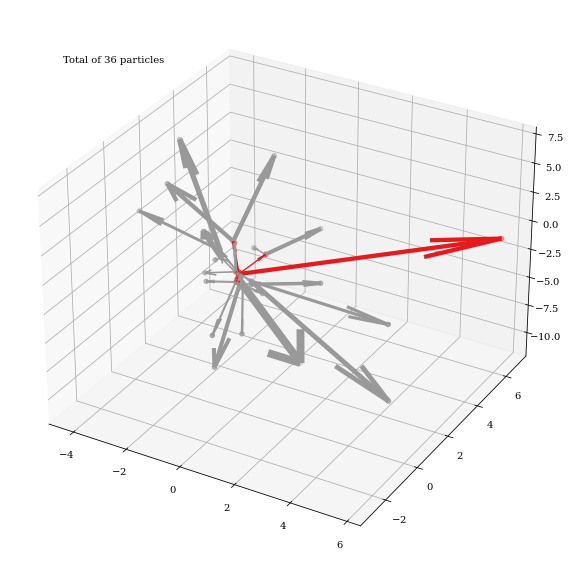

In [38]:
np. random .seed (123456)
scls = Solution(10)
scls.run(tmax=5).visualize()

## Opsummering

- Undgå variable der lever i toppen (globale variable)
- Indkapsel din data i funktioner eller objekter 
- Tag _alle_ parametre ind udefra

## Summary

- Avoid variables that live at the top of the code (global variables).
- Encapsulate your data in functions or objects
- Take _all_ parameters from outside

# Tænk i afbildninger 

# Think in terms of mappings

Vi kan forstå en Python _funktion_ som en afbildning i mere matematisk forstand.  I matematik vil vi ofte skrive en funktion som afbildningen fra domænet $X$ ind i værdimængden $Y$ 

We can understand a Python _function_ as a mathematical _mapping_. In mathematics we will often write a function as the mapping from the domain $X$ into the value set $Y$

$$f: X\rightarrow Y\quad.$$

Nogle eksempler

Some examples

- $f:\mathbb{R}\rightarrow\mathbb{R}$ hvor $f(x) = ax+b$,
- $f:\mathbb{R}\rightarrow\mathbb{C}$ hvor $f(x) = e^{ix}$,
- $f:\mathbb{R}\rightarrow\mathbb{R}^+$ hvor $f(x) = |x|$, 

Pointen her er at vi klart kan gennemskue hvilken mængde $f$ virker på, og at det ligeledes er klart hvilken mængde der afbildes ind i.  I en egentlig afbildning sker der intet andet end af værdier i mængden $X$ afbildes over i mængden $Y$.  Vi kan også tænke på det som om at når vi evaluerer funktionen $f$, så ændre vi aldrig noget ved $f$.  

The point here is that we can clearly see which set $f$ is working on, and that it is also clear which set is mapped into. In an true mapping, _all_ that happens is that a value in $X$ is mapped onto $Y$. We can also think of it as we evaluate the function $f$ we never change $f$.

Hvis vi tænker en Python funktion som en afbilding af denne slags, så må vi sige at en funktion afbilder sine argumenter over i andre værdier, _og intet andet_.  Nogle simple eksempler er  

If we think of a Python function as a mapping of this kind, then we can say that the function maps its arguments into some other values, _and nothing else_. Some simple examples are

In [39]:
def f(x):
    return x**2

def g(x,y):
    return x*y

som afbilder for eksempel $\mathbb{R}$ ind i $\mathbb{R}$.  Andre funktioner kan stadig forståes som afbildninger selv om de ikke umiddelbart ligner det.  Det er funktioner som 

which for example maps $\mathbb{R}$ into $\mathbb{R}$. Other functions can equally be understood as mappings even though they are not obviously similar. That is functions like 

In [40]:
def getData():
    with open('data.csv') as file:
        return np.genfromtxt(file)
    
def printData(data):
    with np.printoptions(precision=3,suppress=True):
        print(data)

Den første afbilder den tomme mængde $\emptyset$ ind i for eksempel $\mathbb{R}^{N}\times\mathbb{R}^{M}$, mens den anden afbilder for eksempel $\mathbb{R}^{N}\times\mathbb{R}^{M}$ ind i den tomme mængde.  Pointen er, at funktionerne ikke har andre effekter end at tage argumenter ind eller give værdier tilbage.  En anden måde at sige det på er, at afbildninger aldrig ændre _tilstand_ på dens argumenter eller andre objekter, og at nye tilstande rapporteres tilbage som retur-værdier. 

Bemærk at i Python er den tomme mængde $\emptyset$ repræsenteret ved værdien `None`. 

Lad os se på nogle funktioner som _ikke_ er afbildninger. 

The first function maps the empty set $\emptyset$ into, for example, $\mathbb{R}^{N}\times\mathbb{R}^{M}$, while the second maps, for example, $\mathbb{R}^{N}\times\mathbb{R}^{M}$ into the empty set. The point is that the functions have no effects other than to take arguments in or give values back. Another way of saying this is that mappings never change the _state_ of its arguments or other objects, and that new states are reported back as return values.

Note that in Python the empty set $\emptyset$ is represented by the value `None`.

Let's look at some features that _are not_ mappings.

In [41]:
def insertElement(a,i,v):
    a[i] = v

a = np.arange(5)
insertElement(a,2,42)
assert a[2] == 42

Funktionen ovenover ændre på argumentet `a` som illusteret i de sidste 3 linier.  Derfor er funktionen `insertElement` _ikke_ en afbilding.  

I Python arver enhver funktion alt fra det omliggende skopus.  En funktion kan derfor ændre ting i dens skopus _uden_ at det gives som argument til funktionen.  

The function above change the argument `a` as illustrated in the last 3 lines. Therefore, the function `insertElement` _is not_ an image.

In Python, every function inherits everything from the surrounding scope. A function can therefore change things in its scope _without_ that thing being passed as argument to the function.

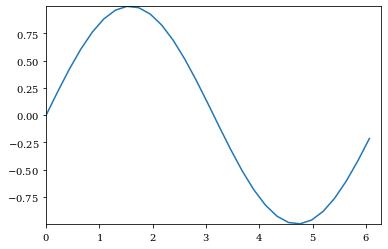

In [42]:
def animate(f,x):
    l, = plt.plot(x[:0], f(x[:0]))
    plt.xlim(x[0],x[-1])
    plt.ylim(f(x).min(),f(x).max())
    
    def update(i):
        l.set_data(x[:i],f(x[:i]))
    
    from time import sleep
    from IPython import display
    for i in range(1,len(x)):
        display.display(plt.gcf())
        update(i)
        sleep(.01)
        display.clear_output(wait=True)
        
animate(np.sin, np.linspace(0,2*np.pi,30))

Den indre funktion `update` ovenover er _ikke_ en afbilding da den ændre tilstand på objektet `l`. En anden måde at se det på er at vi ikke skriver `update` på en sådan måde at _ændringer_ bliver givet tilbage som returværdier. 

Ændringer som _ikke_ gives tilbage som returværdier kaldes _sidefunktioner_ (eller _bivirkninger_).  Vi kan altså sige at 

- En afbildning har ingen _sidefunktioner_ 

Funktionen `insertElement` har den sidefunktion at ændre på den første argument, mens `animate.update` ovenover har den sidefunktion at ændre på objektet `animate.l`. 

Det er klart, at hvis vi skriver funktioner med sideeffekter, så kan vi nemt komme til at ændre tilstand på objekter på en uigennemsigtig måde, og dermed gøre det sværer at have sikkerhed for at vores løsningsmodel faktisk gør det vi ønsker.  Vi kan altså se, at ønsket om at skrive _afbildninger_ (funktioner uden sidefunktioner) ligger i forlængelse af vores principper om validering (se [ovenover](#Validering)) og have styr på vores data (se [igen ovenover](#Vid-hvilken-data-du-arbejder-med)).

The inner function `update` above is _not_ a mapping as it changes the state of the object `l`. Another way to see that is that we do not write `update` in such a way that _changes_ are given back as return values.

Changes that _are not_ returned as return values are called _side effects_. Thus, we can say that

- A mapping has no _side effects_

The `insertElement` function has the side effect of changing the first argument, while `animate.update` above has the side effect to change the object `animate.l`.

It is clear that if we write functions with side effects, then we can easily change the state of objects in a opaque fashion, thus making it difficult to have confidence that our solution actually does what we want. We can thus see that the desire to write _mappings_ (functions without side effects) is in line with our principles of validation (see [above](#Validation)) and have control of our data (see [above](#Know-what-data-you-are-working-on)).

## Funktionel programmering versus funktionelle programmeringssprog

Der findes skoler indenfor programmering hvor side-effekter er banlyste, lige som der findes sprog hvor det (næsten) ikke er muligt at lave side-effekter.   

Disse skoler kaldes ofte "funktionel programmering", fordi de fokuserer på at skrive "rene" funktioner uden side-effekter.   Det må dog ikke forveksles med funktionelle programmings_sprog_.

I den sidste kategory finder man [_rene funktionelle programmingssprog_](https://en.wikipedia.org/wiki/Purely_functional_programming#Purely_functional_language) hvor alt er funktioner, og disse kan aldrig have side-effekter.  I et sådant sprog er det ikke muligt at tilordne værdier, da det er en side-funktion.  Det vil altså ikke være muligt at gøre

## Functional programming versus functional programming language

There are schools within programming where side effects are forbidden, just as there are languages where is is (almost) impossible to make side effects.

These schools are often called "functional programming" because they focus on writing "clean" functions without side effects. However, this should not be confused with functional programming _languages_.

In the last category you find [_pure functional programming language_](https://en.wikipedia.org/wiki/Purely _functional_programming#Purely_functional_language) where everything are functios and these can never have side effects. In such a language, it is not possible to assign values as assignment is change of state (or side effect). It will not be possible to do so

In [43]:
a = 42

eller hvis man kan, så definerer man en _konstant_ som aldrig kan ændres. 

En af de sprog der nok kommer tættest på dette er [*Haskell*](https://www.haskell.org/). 

Hvis man har et rent funktionelt programmeringssprog er det i princippet muligt at bevise (matematisk) om et given program virker.   Det gør denne slags sprog interessante for dem der er interesseret i udvilking af algoritmer,  evalueringssystemer og lignende. 

Python er ikke et rent funktionelt programmeringssprog.  Det er dog [muligt](https://docs.python.org/3/howto/functional.html) at skrive Python kode som _hovedsagligt_ er fri for side-effekter.  Python er som sådan et _multi-paradigme_ sprog, og funktionel programmering er en konvention som man kan vælge at følge eller lade være.  Vi vil dog _anbefale_ at man _tilstræber_ en kodestil hvor sideeffekter minimeres. 

**Bemærk**: Når vi bruger _funktionelt_ her mener vi det i den _svage_ betydning og _ikke_ i betydningen af _rent_ funktionelt programmeringssprog. 

or if one can, then one defines a _constant_ which can never be changed.

One of the languages that probably comes closest to this is [*Haskell*](https://www.haskell.org/).

If you have a purely functional programming language, it is in principle possible to prove (mathematically) whether a given program works. It makes this kind of language attractive to those interested in developing algorithms, evaluation systems, and the like.

Python is not a pure functional programming language. However, it is [possible](https://docs.python.org/3/howto/functional.html) to write Python code that is _mainly_ free of side effects. Python is such a _multi-paradigm_ language, and functional programming is a convention that one can choose to follow or not. However, we will _recommend_ to _aim for_ a code style where side effects are minimized.

**Note**: When we use _functionally_ here, we mean it in the _weak_ meaning and _not_ in the meaning of _pure_ functional programming language.

## Funktionel og objekt orienteret programming 

Ovenover i afsnittet om data (se [her](#Vid-hvilken-data-du-arbejder-med)) havde vi to løsninger til hvordan vi kan sikre os at vi arbejdede med den korrekte data.  De to slags løsninger var henholdvis _funktionel_ (se [her](#Eksempel:-Adgang-til-data-via-en-funktion)) og _objekt-orienteret_ (se [her](#Eksempel:-En-fir-vektor-klasse)). Wikipedia giver følgende beskrivelser af disse to som 

## Functional and object oriented programming

Above in the section on data (see [here](#Know-what-data-you-are-working-on)) we had two solutions for how we can ensure that we worked with the correct data. The two kinds of solutions were _functional_ (see [here](#Example:-Accessing-data-via-a-function)) and _object-oriented_ (see [here](#Example:-A-four-vector-class)). Wikipedia gives the following descriptions of these two as

- In computer science, **functional programming** is a programming paradigm — a style of building the structure
  and elements of computer programs — that treats computation as the evaluation of mathematical functions and
  avoids changing-state and mutable data. [_Wikipedia_](https://en.wikipedia.org/wiki/Functional_programming)

- **Object-oriented programming** (OOP) is a programming paradigm based on the concept of _objects_, 
  which may contain data, in the form of fields, often known as attributes; and code, in the form of 
  procedures, often known as methods. [_Wikipedia_](https://en.wikipedia.org/wiki/Object-oriented_programming)

Forskellen mellem funktionel og objekt orienteret programmering ligger altså i høj grad i hvordan vi behandler _data_: 

- I funktionel programmering laver vi _afbildninger_ der virker på data.  Afbildninger har ingen intern _tilstand_ (_state_), og data behandles i det store hele som konstant (ændres ikke). 
- I objekt orienteret programmering knyttes data og beregninger sammen i _objekter_. Objekter _har_ intern _tilstand_ som kan ændres, hvor ændringerne dog er veldefinert af den _klasse_ et objekt tilhører. 

Hvilket paradigme der er bedst er ikke nemt at svarer på - det afhænger i høj grad af hvilket problem vi forsøger og løse, og i mange tilfælde vil vi have en blanding af de to paradigmer.  Det er i og for sig ikke noget problem så længe vi er påpasselige med at have klarhed over hvilken tilgang vi bruger hvor. 

The difference between functional and object oriented programming is thus largely in how we treat _data_:

- In functional programming we make _mappings_ that work on data. Mappings have no internal _state_, and data is generally treated as constant (does not change).
- In object oriented programming, data and calculations are linked together in _objects_. Objects _have_ internal _state_ which can be changed, but the changes are well defined by the _class_ an object belongs to.

Which paradigm is best is not easy to answer - it depends largely on the problem we are trying and solving, and in many cases we will have a mix of the two paradigms. It is not a problem as such, as long as we are careful to clarify which approach we use.

Ovenover har vi defineret to måder at behandle fir-vektorer på som tilfældighvis er udtryk for en funktionel og objekt-orienteret tilgang.  Vi vil tage vektoren 

Above, we have defined two ways of processing four-vectors, which, incidentally, represent a functional and object-oriented approach. We want to take the vector

\begin{align*}
  \tilde u = \begin{bmatrix} 1\\1\\0\\0\end{bmatrix}\quad,
\end{align*}

og transformerer til et andet system med den relative hastighed 

and transforms into another system with the relative velocity

\begin{align*}
 \vec v = \begin{bmatrix} 0.1\\0.2\\0.3\end{bmatrix}\quad.
 \end{align*}

Først den funktionelle tilgang 

First, the functional approach

In [44]:
u = np.array([1, 1, 0, 0])
v = np.array([.1, .2, .3])
up = transform(u,v)
with np.printoptions(precision=3):
    print("{} -> {} via {}".format(u,up,v))

[1 1 0 0] -> [1.186 1.113 0.227 0.34 ] via [0.1 0.2 0.3]


Bemærk at hvis vi havde skrevet 

Note, if we had written

In [45]:
u = transform(u,v)

som er fuldt muligt, ville vi have behandlet data'en `u` som ikke-konstant, og vi ville have forbrudt os mod den funktionelle tilgang. 

Lad os nu kigge på den objekt-orienteret tilgang til det samme problem 

which is possible, we would have treated the data `u` as non-constant, and we would have broken the functional approach.

Now let's look at the object-oriented approach to the same problem

In [46]:
u = FourVector(1,1,0,0)
with np.printoptions(precision=3):
    print("{} ".format(u[:]),end='')
    u.transform(v)
    print("-> {} via {}".format(u[:],v))

[1. 1. 0. 0.] -> [1.186 1.113 0.227 0.34 ] via [0.1 0.2 0.3]


Her, når vi kalder funktionen `u.transform` ændre vi klart tilstanden af `u` og dette objekt kan ikke betegnes som konstant.  På den anden side er det veldefineret hvad der sker.  Vi kan dog modificerer vores klasse `FourVector` en smule så at objekter af denne klasse er konstanter.   Her gør vi det via _nedarving_ hvor vi omdefinerer metoden `transform` sådan at den ikke ændre tilstand på objektet men i stedet returnerer et nyt `FourVector` objekt. 

Here, when we call the `u.transform` function, we clearly change the state of `u` and this object cannot be called constant. On the other hand, it is well-defined what happens. However, we can slightly modify our `FourVector` class so that objects of this class _are_ constant. Here we do it via _inheritance_ by which we redefine the `transform` method so that it does not change the state of the object but instead returns a new `FourVector` object.

In [47]:
class ConstantFourVector(FourVector):
    def transform(self,v):
        gamma = 1/np.sqrt(1-(v**2).sum())
        e, p = \
            gamma*(self._u[0]+np.dot(self._u[1:],v)), \
            self._u[1:] + ((gamma-1)*np.dot(self._u[1:],v)/(v**2).sum()
                            +gamma*self._u[0])*v
        return ConstantFourVector(e,*p)

u = ConstantFourVector(1,1,0,0)
up = u.transform(v)
with np.printoptions(precision=3):
    print("{} -> {} via {}".format(u[:],up[:],v))

[1. 1. 0. 0.] -> [1.186 1.113 0.227 0.34 ] via [0.1 0.2 0.3]


Hvilken tilgang der er mest nyttig afhænger af formålet, men det er klart at man kan designe sin løsningsmodel klart og effektivt ved brug af disse paradigmer - evt. i en blanding.  En forholdsvis simpel huskeregel som virker langt hen af vejen er 

- Data _om_ $X$ behandles bedst funktionelt 
- $X$ _modelleres_ bedst objekt orienteret 

Det kan vi også se af det ovenstående:  Skal vi manipulerer et enkelt objekt, f.eks. en fir-vektor, så gøres det bedst objekt orienteret.  Skal vi derimod behandle data om flere objekter på samme måde, f.eks. gennemsnitlig $\beta$, så gøres det bedst funktionelt.  

Which approach is most useful depends on the purpose, but it is clear that you can design your solution clearly and effectively using these paradigms - possibly. in a mixture. A relatively rule of thumb that works in most cases is

- Data _about_ $X$ is best treated functionally
- $X$ is best _modeled_ object oriented

We can also see this from the above: If we want to manipulate a single object, for example a four vector, the best approach is object oriented. On the other hand, are we to treat data on several objects in the same way, for example. average $\beta$, then the best approach is functional.

## Opsummering

- Tænk funktioner som matematiske afbildninger 
- Undgå sidefunktioner 

## Summary

- Think of functions as mathematical mappings
- Avoid side effects

# Brug optimeret kode og givne funktioner

Vi har ofte brug for at lave en eller anden slags beregninger som andre tidligere også har haft brug for.  Hvis  det er tilfældet, så kan vi ofte finde _pakker_ eller _moduler_ som indeholder generelle løsninger til et problem. 

# Use optimized code and given functions

We often need to make some kind of calculations that others have previously needed. If so, we can often find _packages_ or _modules_ that contain general solutions to a problem.

## Eksempel: Drevet og dæmpet harmonisk oscillator

En harmonisk oscillator med dæmpning $c$ og ekstern kraft $F(t)$ har bevægelsesligningerne 

## Example: Driven and muted harmonic oscillator

A harmonic oscillator with damping $c$ and external driving force $F(t)$ has the equations of motion

\begin{align*}
  \frac{\mathrm{d}\vartheta}{\mathrm{d}t} &= \omega\\
  \frac{\mathrm{d}\omega}{\mathrm{d}t} = \frac{\mathrm{d}^2\vartheta}{\mathrm{d}t}
  &= -c \omega - \sin\vartheta + F(t)\quad,
\end{align*}

hvor $\vartheta$ er udsvinget og $\omega$ er vinkelhastigheden.  Lad os definerer tilstanden 

where $\vartheta$ is the amplitude of oscillation and $\omega$ is the angular velocity. Let us define the state

\begin{align*}
  \vec x &= \begin{bmatrix} \vartheta\\ \omega\end{bmatrix}\quad.
\end{align*}

Så kan vi opskrive de koplet differentialligningerne ovenover som 

We can then write the coupled differential equations above as

\begin{align*}
  \frac{\mathrm{d}\vec x}{\mathrm{d} t} = f(t,\vec x)
  &= \begin{bmatrix}
    \omega\\
    -c\omega - \sin\vartheta + F(t)
    \end{bmatrix}\quad.
\end{align*}

For at finde bevægelsen over tid vil vi bruge en Runge-Kutta metode af fjerde orden, givet ved 

To find the movement over time we will use a Runge-Kutta method of the fourth order given by

\begin{align*}
  \vec k_1 &= f\left(t_i,\vec x_i\right)\\
  \vec k_2 &= 
  f\left(t_i + \tfrac{\Delta t}{2}, \vec x_i+\tfrac{\Delta t}{2}\vec k_1\right)\\
  \vec k_3 &= 
  f\left(t_i + \tfrac{\Delta t}{2}, \vec x_i+\tfrac{\Delta t}{2}\vec k_2\right)\\
  \vec k_4 &= 
  f\left(t_i + \Delta t, \vec x_i+\Delta t\vec k_1\right)\\
  \vec x_{i+1} &= \vec x_i + \tfrac{\Delta t}{6}\left(\vec k_1 + 2\vec k_2 + 2\vec k_3 + \vec k_4\right)\quad,
\end{align*}

hvor $\vec x_i$ er tilstanden til tiden $t_i=t_0+\Delta t$.  Vi kan opskrive dette i kode med 

where $\vec x_i$ is the state at time $t_i=t_0+\Delta t$. We can write this in code as

In [48]:
def rk4(f,ti,xi,dt,*args):
    k1 = f(ti,      xi,        *args)
    k2 = f(ti+dt/2, xi+dt/2*k1,*args)
    k3 = f(ti+dt/2, xi+dt/2*k2,*args)
    k4 = f(ti+dt,   xi+dt  *k3,*args)
    return xi + dt/6*(k1+2*k2+2*k3+k4)

hvor 

- `xi` er $x_i$, `ti` er $t_i$, `dt` er $\Delta t$,  
- `f` er $f=\tfrac{\mathrm{d}\vec x}{\mathrm{d}t}:\mathbb{R},\mathbb{R}^2\rightarrow\mathbb{R}^2$, og 
- `*args` er mulige ekstra argumenter vi vil give til `f` (f.eks. $c$ og $F(t)$).

Vi har altså brug for funktionen `f` som indkoder vores højresider af differentialligningerne.  Bemærk at vi vil kunne give en tidsafhængig drivende kraft, så vi formulerer vores funktion sådan at det er muligt

where

- `xi` is $x_i$, `ti` is $t_i$, and `dt` is $\Delta t$,
- `f` is $f=\tfrac{\mathrm{d}\vec x}{\mathrm{d}t}:\mathbb{R},\mathbb{R}^2\rightarrow\mathbb{R}^2$, and
- `*args` are possible additional arguments we will pass on to `f` (eg $c$ and $F(t)$).

We need the function `f` which encodes our right-hand sides of the differential equations. Note that we want be able to provide a time-dependent driving force so we formulate our function so that that is possible

In [49]:
def osc(t,xi,c,Ft):
    return np.array([xi[1],
                     -c*xi[1]-np.sin(xi[0])+Ft(t)])

Endlige har vi brug for en funktion der integrerer over tid.  Her vil vi lave en funktion som tager vores `f`, en række tider, start $\vec x$, og evt. $c$ og $F(t)$. Funktionen vil returnere tiderne og $\vartheta$ og $\omega$ til disse tider 

Finally, we need a function that integrates over time. Here we will create a function that takes our `f`, a list of times, start $\vec x$, and possibly $c$ and $F(t)$. The function will return the times and $\vartheta$ and $\omega$ at these times

In [50]:
def solve(f,t,x0,c=1,Ft=lambda t:0):
    x = np.asarray([x0])
    t0 = t[0]
    
    for ti, dt in zip(t,np.diff(t)):
        xi = rk4(f,ti,x[-1],dt,c,Ft)
        x = np.vstack((x,xi))
        
    return t, x

For at finde vores løsning over tid har vi brug for nogle start betingelser.  Vi vælger 

In order to find our solution over time, we need some initial conditions. We choose

- $\vartheta = \pi/4$,
- $\omega = 0$,
- $c=0.3$,
- $F(t) = 0$
- $t\in[0,30]$, $\Delta t=0.1$

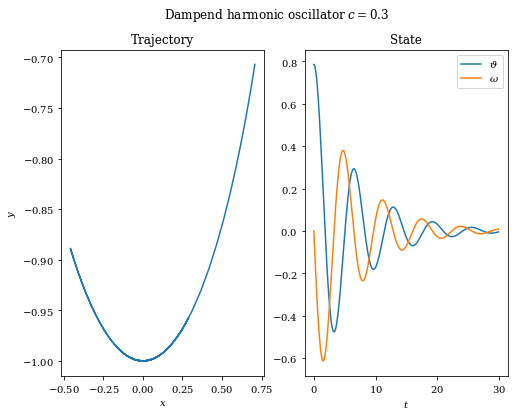

In [51]:
def plotSolution(t,x,title=''):
    fig, ax = plt.subplots(ncols=2,figsize=(8,6))
    fig.suptitle(title)
    ax[0].plot(np.sin(x[:,0]),-np.cos(x[:,0]))
    ax[0].set_xlabel(r'$x$')
    ax[0].set_ylabel(r'$y$')
    ax[0].set_title('Trajectory')
    ax[1].plot(t,x[:,0],label=r'$\vartheta$')
    ax[1].plot(t,x[:,1],label=r'$\omega$')
    ax[1].set_xlabel(r'$t$')
    ax[1].set_title('State')
    ax[1].legend();

c=0.3
plotSolution(*solve(osc,np.arange(0,30,.1),[np.pi/4,0],c),
             'Dampend harmonic oscillator $c={{{:.1f}}}$'.format(c))

Lad os nu give en ekstern drivende kraft 

Let us now give an external driving force

$$F(t) = \frac{\sin(t)}{5}\quad.$$

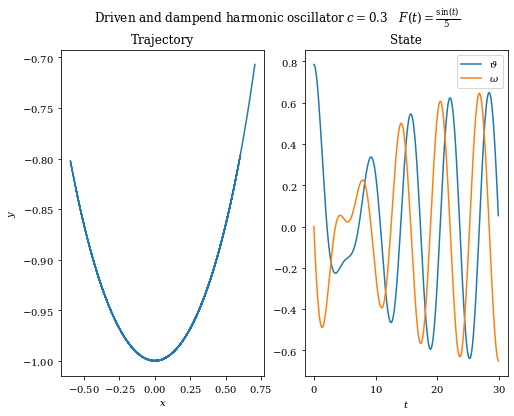

In [52]:
plotSolution(*solve(osc,np.arange(0,30,.1),[np.pi/4,0],c,lambda t:.2*np.sin(t)),
             'Driven and dampend harmonic oscillator '
             r'$c={{{:.1f}}}\quad F(t)=\frac{{\sin(t)}}{{5}}$'.format(c))

Men det er ikke første gang at nogen har forsøgte at løse et sådant begyndelsesværdi problem (_initial value problem_). Derfor findes der da også (bedre) metoder til at løse det her problem.  Vi kan f.eks. bruge `scipy.integrate.solve_ivp` til dette.  Lad os prøve det. 

But it is not the first time anyone has tried to solve such an _initial value problem_. Therefore, there exists  (better) methods to solve this problem. For example, we can use `scipy.integrate.solve_ivp` for this. Let us try it.

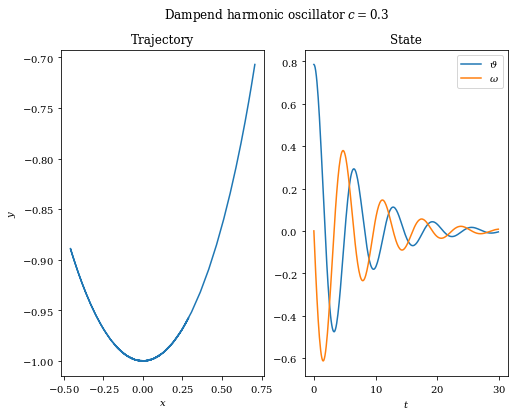

In [53]:
#help(sp.integrate.solve_ivp)
ret = sp.integrate.solve_ivp(lambda t,x: osc(t,x,c=0.3,Ft=lambda t:0), 
                             [0,30], [np.pi/4,0], t_eval=np.arange(0,30,.1))
plotSolution(ret.t,ret.y.T,'Dampend harmonic oscillator $c={{{:.1f}}}$'.format(c))

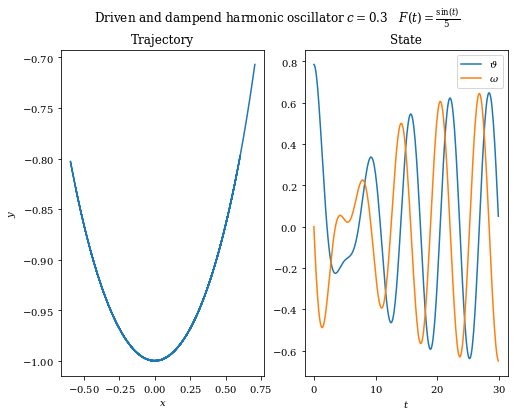

In [54]:
ret = sp.integrate.solve_ivp(lambda t,x: osc(t,x,c=0.3,Ft=lambda t:0.2*np.sin(t)), 
                             [0,30], [np.pi/4,0], t_eval=np.arange(0,30,.1))
plotSolution(ret.t,ret.y.T,'Driven and dampend harmonic oscillator '
             r'$c={{{:.1f}}}\quad F(t)=\frac{{\sin(t)}}{{5}}$'.format(c))

Her er flere ting bemærke med hensyn til fordelene ved ar bruge `scipy.integrate.solve_ivp` 

- `solve_ivp` er en meget generel Ordinær Differential Ligningsløser, og kan bruges i mange tilfælde hvor vores `solve` ovenover kan fejle. 
- Vores `solve` bruger en eksplicit `for`-løkke over tid, som generelt er langsomt at afvikle i Python.  `solve_ivp` kan undgå disse løkker og delegerer den del ting til hurtigere, binær kode. 
- `solve_ivp` kommer fra det populærer bibliotek _SciPy_, som rigtig mange bruger og udvikler på, så der er langt mindre chance for at der er fejl i koden end der er i vores `solve`. 

Man bør dog _altid_ redegøre hvorfor og hvordan man bruger den slags biblioteks funktionalitet. 

Here are several things to note about the benefits of using `scipy.integrate.solve _ivp`

- `solve_ ivp` is a very general Ordinary Differential Equation Solver, and can be used in many cases where our` solve` above would fail.
- Our `solve` uses an explicit `for` loop over time, which is generally slow to run in Python. `solve_ivp` can avoid these loops and delegate that part of things to faster, binary code.
- `solve_ivp` comes from the popular library _SciPy_, which many people use and develop, so there is much less chance of errors in the code than in our` solve` .

However, you should always _always_ explain why and how to use that kind of library's functionality.

I vores eksempel ovenover havde vi en eksplicit `for`-løkke over data.  Det er som sagt langsomt for Python at afvikle da indeholdet af løkken skal eksekveres mange gange og Python skal holde styr på alt.  Biblioteket `NumPy` (og andre) indeholder _effektiv_ funktionalitet til at løbe henover data.  Den funktionalitet er typisk størrelsesordner hurtigere og mere effektiv på grund af data bliver sendt til hurtig binær kode.  

In our example above, we had an explicit `for` loop over data. It is, as mentioned above, slow for Python to execute as the contents of the loop must be executed many times and Python must keep track of everything. The library `NumPy` (and others) contains _effective_ functionality to run over data. The functionality is typically orders of magnitude faster and more efficient due to data being sent to fast binary code.

## Eksempel: Beregning af afstande

Lad os sige vi har en dataramme bestående af to-vektorer 

Assume we have a data array consisting of two-vectors

$$\vec v_i = \begin{bmatrix} x_i\\_i\end{bmatrix}\quad,$$

og vi ønsker nu at beregne alle afstandene mellem vektorerne 

and we want to calculate all the distances between all the vectors

$$ d_{ij} = |\vec v_i - \vec v_j|\quad.$$ 

Det kan vi gøre på den langsomme, ligefrem måde 

We can do that in the slow, straightforward way

In [55]:
def distances(v):
    d = np.zeros((len(v),len(v)))
    for i, vi in enumerate(v):
        for j, vj in enumerate(v):
            d[i,j] = np.sqrt((vi[0]-vj[0])**2+(vi[1]-vj[1])**2)
    return d;
v = np.random.random(size=(100,2))

In [56]:
%timeit distances(v)

48.1 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


En anden måde er at bruge `scipy.spatial.distance.pdist`

Another way is to use `scipy.spatial.distance.pdist`

In [57]:
%timeit sp.spatial.distance.squareform(sp.spatial.distance.pdist(v))

94.4 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Vi ser der er næsten en faktor 1000 til forskel mellem beregninger. 

We see that there is almost a factor of 1000 difference between calculations.

## Eksempel: Tælle mindste 

Lad os tage et andet eksempel.  Her har vi to datarammer $x$ og $y$, og vi vil finde for hver $y_i$ hvor mange $x_j$ der opfylder at 

$$ x_j < x_i\quad.$$ 

Koden nedenunder går det eksplicit.

## Example: Count the smallest

Let's take another example. Here we have two data arrays $x$ and $y$, and we want to find for each $y_i$ how many $x_j$ that meet the condition

$$ x_j < x_i\quad.$$

The code below does this explicitly.

In [58]:
def countlower(x, y):
    result = 0
    for i in range(len(x)):
        for j in range(len(y)):
            if x[i] < y[j]:
                result += 1
    return result
a,b = np.arange(0,200,2),np.arange(40,140)

In [59]:
%timeit countlower(a,b)

6 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


En anden måde er at sorterer $x$, og så derefter for hver $y_i$ finde det indeks $j$ så at

$$x_j < y_i \le x_{j+1}\quad.$$ 

$j$ er da antallet af $x$ værdier der er mindre end $y_i$ og vi kan summe over disse indeks. 

Another way is to sort $x$ and then for each $y_i$ find the index $j$ such that

$$x_j < y_i \le x_{j+1}\quad.$$

$j$ is the number of $x$ values that are less than $y_i$ and we can sum over these indices.

In [60]:
%timeit np.sum(np.searchsorted(np.sort(a), b))

22.3 µs ± 7.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Igen har vi næsten en faktor 1000 til forskel. 

Der er desværre ikke rigtig nogle gode huskeregler for hvordan man finder den optimale løsning på et givent problem.  Som en bruger skriver på [StackExchange](https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought) (det sidste eksempel kommer fra den tråd)

Again, we have almost a factor of 1000 difference.

Unfortunately, there are not really any good rules for how to find the optimal solution to a given problem. As a user writes on [StackExchange](https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought) (the last example comes from that thread)

> Here's the general approach I take:
> 
> - Keep the original version of the function (which you are confident is correct) 
>   so that you can test it against your improved versions both for correctness and 
>   speed.
>
> - Work from the inside out: that is, start with the innermost loop and see if 
>   can be vectorized; then when you've done that, move out one level and continue.
> 
> - Spend lots of time reading the NumPy documentation. There are a lot of functions 
>   and operations in there and they are not always brilliantly named, so it's worth
>   getting to know them. In particular, if you find yourself thinking, "if only 
>   there were a function that did such-and-such," then it's well worth spending 
>   ten minutes looking for it. It's usually in there somewhere.

Med `vectorized` menes at en given beregning kan gøres over en hel data ramme snare en i bidder.  Et eksempel er funktionen `numpy.diff` som beregner afstanden mellem nabo-elementer i en dataramme.  Naivt ville man skrive 

By `vectorized` is meant that a given calculation can be made over an entire data array rather than one in bits. An example is the `numpy.diff` function, which calculates the distance between neighbor elements in a data array. Naively you would write

In [61]:
def diff(a):
    r = np.zeros(len(a)-1)
    for i, (ai, aj) in enumerate(zip(a[1:],a[:-1])):
        r[i] = ai - aj
    return r
a = np.arange(1,1001)
%timeit diff(a)

735 µs ± 130 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


_numpy.diff_ gør det mere effektivt a la

_numpy.diff_ makes it more effective

In [62]:
def vdiff(a):
    return a[1:]-a[:-1]
%timeit vdiff(a)

4.78 µs ± 219 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Her bliver _alle_ forskelle beregnet på én gang. Det kan være fristende at bruge `numpy.vectorize` for at opnå denne effekt, men det giver egentlig kun mening hvis den funktion man vektoriserer er implementeret binært (for eksempel i C)

Here, _all_ differences are calculated at once. It can be tempting to use `numpy.vectorize` to achieve this effect, but it really only makes sense if the function you vectorize is implemented binary code (e.g., in C).

In [63]:
import math
vlog = np.vectorize(lambda a:math.log(a))
%timeit vlog(a)
%timeit np.log(a)

400 µs ± 52.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.7 µs ± 3.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Pointen er at `numpy.vectorize` ikke kan gøre det ud for at man tænker sig om. 

The point is that `numpy.vectorize` cannot substitute you thinking about the problem.

## Opsummering

- Forsøg så vidt muligt at bruge løsninger der er testet godt
- Undgå eksplicite løkker

## Summary

- As far as possible, try to use solutions that have been tested.
- Avoid explicit loops.

# Saml ofte brugt kode

# Collect frequently used code

Tit kommer vi ud for at vi bruger de samme kodestykker igen og igen i forskellige projekter.  Den bedste måde at genbruge den slags kode stykker er ved at lave et Python _modul_.   Et modul er bare en fil der indeholder kode som vi kan importerer ind i et projekt med `import`.  

We often find ourselves using the same code snippets again and again in different projects. The best way to reuse that kind of code pieces is by making a Python _module_. A module is just a file that contains code that we can import into a project with `import`.

## Eksempel: Modul med fir-vektor 

Hvis vi ofte bruger fir-vektorer i vores projekter kunne vi passende putte vores funktion `transform` oven over i et modul.  Vi kunne kalde modulet `mymodule.py` og den fil kunne indeholde `transform`, `norm`, osv. fra ovenover.  Lad os her skrive koden til en fil

## Example: Module with fir-vector

If we often use four-vectors in our projects we could put our function `transform` into a module. We could call the module `mymodule.py` and that file could contain` transform`, `norm`, etc. from above. Let's write that code to a file

In [64]:
import inspect
with open('mymodule.py','w') as file:
    file.write("import numpy as np\n")
    file.write(inspect.getsource(norm))
    file.write(inspect.getsource(transform))

Filen `mymodule.py` indeholder nu definationerne for `norm` og `transform`.  Vi kan importerer dem her med 

The `mymodule.py` file now contains the definitions of `norm` and `transform`. We can import them here with

In [65]:
import mymodule 
for f  in mymodule.norm, mymodule.transform:
    help(f)

Help on function norm in module mymodule:

norm(p)

Help on function transform in module mymodule:

transform(u, p)



Bemærk at funktionerne nu hedder `mymodule.norm` og `mymodule.transform`.  Vi kan kalde disse funktioner nu de er importeret.  

Note that the functions are now called `mymodule.norm` and `mymodule.transform`. We can call these features now that they are imported.

In [66]:
mymodule.norm(np.array([1,1,0,0]))

0.0

## Placering af moduler

Python bruger variablen `sys.path` til at finde kode.  Typisk indeholder denne variabel en liste af folderer der er sat af systemet selv.  Derudover kan vi også tilføje folderer via _miljøvariablen_ (engl. [environment variable](https://en.wikipedia.org/wiki/Environment_variable)) `PYTHONPATH`.  Den folder som vi starter Python (eller lignende) i bliver også afsøgt for kode. 

Variablen `sys.path` indholder typisk en folder som er bruger specifik.  På Un*x (GNU/Linux og lignende) er folderen 

## Location of modules

Python uses the `sys.path` variable to find code. Typically, this variable contains a list of folders set by the system itself. In addition we can also add folders via the [_environment variable_](https://en.wikipedia.org/wiki/Environment_variable)) `PYTHONPATH`. The folder we start Python (or similar) in will also be searched for code.

The variable `sys.path` typically contains a folder that is user specific. On Un\*x (GNU/Linux and the like) the folder is

- <code>~/.local/lib/python<i>&lt;version&gt;</i>/site-packages</code>

hvor <code>&lt;version&gt;</code> er Python versionsnummeret.  For andre systemer er det noget [andet](https://docs.python.org/3/library/site.html#site.USER_SITE), for eksempel 

where <code>&lt;version&gt;</code> is the Python version number, part of `sys.path`. For other systems, it is something [else](https://docs.python.org/3/library/site.html#site.USER_SITE), for example

- <code>~/Library/Python/<i>&lt;version&gt;</i></code>

på MacOSX, og 

on MacOSX, and

- `%APPDATA%\Python`

på Windows.  

Disse folderer er gode steder at putte ens moduler i.   Hvis man vil, kan man lave underfolderer hvori man ligger flere moduler.  For eksempel 

on Windows.

These folders are good places to put in one's modules. E.g

    ~/.local/lib/python3.7/site-packages/mine -+- fourvector.py
                                               +- quantum.py
                                               `- mechanics.py

Hvis man gør det kan man importerer disse moduler med en af 

Doing so one can import these modules with one of

    import mine.fourvector 
    import mine.fourvector as fourvector 
    from mine import fourvector 

## Hold moduler ájour

Ganske ofte finder vi ud af at noget kode nok kan bruges i et andet projekt en der hvor det først blev brugt, men at der mangler noget funktionalitet.   I det tilfælde vil vi _tilføje_ denne funktionalitet til vores modul kode sådan at vi kan drage nytte af denne _nye_ funktionalitet senere hen. 

Det er fristende at kopierer koden til ens nuværende projekt og laver ændringerne dér.  Det betyder dog, at vi kun tilføjer den nye (eller forbedret) funktionalitet til vores _nuværende_ projekt, og vi i fremtidige projekter ikke kan drage nytte af vores arbejde.  Det er derfor bedre at forsøge at lave vores ændringer i det modul vi har lagt i vores biblioteksfolder. 

## Keep modules up to date

Quite often we find that some code can be used in another project than where it was first used, but that some functionality is missing. In that case we will _add_ this functionality to our module code so that we can benefit from this _new_ functionality later on.

It is tempting to copy the code to your current project and make the changes there. However, this means that we only add the new (or improved) functionality to our _current_ project, and in future projects we cannot benefit from our work. It is therefore better to try to make our changes in the module we have placed in our library folder.

## Tilføj validering af moduler 

Som vi har set tidligere (se [ovenover](#Validering)) så er det ekstremt nyttigt af lave test og validering af ens kodestykker.  Når det gælder moduler, som er kode vi vil bruge igen og igen, er det endnu mere vigtigt at vi kan udfører tjek.  Så når vi laver et modul, så vil vi forsøge bedst muligt at lave [enhedstjek](#Pythons-unittest-v%C3%A6rkt%C3%B8j) af vores kode.  

Det betyder også, at når vi tilføjer ny eller forbedres funktionalitet at vi hurtigt kan tjekke at vores kode stadig virker.  Vi bør selvfølgelig også lave nye tjek hvis det giver mening. 

Vi kan enten tilføje vores tjek direkte i vores modul, eller vi kan ligge dem i en fil ved siden af.  Hvis, for eksempel, vores modul hedder `mymodule.py` kan vi ligge vores tjek i `test_mymodule.py`. 

## Add validation of modules

As we have seen earlier (see [above](#Validation)), it is extremely useful to make tests and validation of one's code snippets. When it comes to modules containing code we will use over and over again, it is even more important that we can perform checks. Therefore, when we make a module, we will try to make [unit tests](#Python's-unitest-tool) of our code.

It also means that when we add new or improved functionality we can quickly check that our code still works. We should of course also make new checks if that makes sense.

We can either add our check directly to our module, or we can put them in a file next to it. For example, if our module is called `mymodule.py`, we can check our` test_mymodule.py` check.

## Synkroniser moduler over flere arbejdsstationer 

Det er ikke ualmindeligt at arbejde på flere forskellige arbejdsstationer, og det giver mening at vi nemt kan overfører vores arbejde fra en station til en anden.   Til det er online tjenester som [GitLab](gitlab.com), [GitHub](github.com) og lignende særdeles velegnet.   I sådan en tjenese laver vi et _repository_ af vores kode som vi kan hente ned og synkroniserer mod fra alle vores arbejdsstationer.  Det virker samtidig som en sikkerhedskopiering af vores arbejde og tillader os at falde tilbage til tidligere versioner hvis det bliver nødvendigt. 

Præcis hvordan man bruger en sådan service er for omfattende at komme ind på her, men der er masser af gode vejledninger rundt omkring på nettet (for eksempel [denne video](https://www.youtube.com/watch?v=7p0hrpNaJ14) om GitLab, eller [denne side](https://try.github.io) fra GitHub). 

## Synchronize modules across multiple workstations

Working on multiple workstations is not uncommon, and it makes sense that we can easily transfer our work from one station to another. For this, online services such as [GitLab](gitlab.com), [GitHub](github.com) and the like are particularly suitable. We make a _repository_ in these services of our code which we can download and synchronize against from all our workstations. It also works as a backup of our work and allows us to fall back to previous versions if necessary.

Exactly how to use such a service is too extensive to describe here, but there are plenty of good guides around the web (for example [this video](https://www.youtube.com/watch?v=7p0hrpNaJ14 ) about GitLab, or [this page](https://try.github.io) from GitHub).

## Opsummering

- Saml kode i _moduler_ 
- Strukturer dine moduler i en klar struktur 
- Kopier ikke moduler til dit projekt, men opdatér, udvid, og forbedre dem i dit bibliotek
- Skriv valideringer af din modul kode 
- Brug evt. en online tjeneste til at holde styr på din kode

## Summary

- Collect code in _modules_.
- Structure your modules in a clear way.
- Do not copy modules to your project, but update, expand, and enhance them in your library.
- Write validations of your module code.
- Use an online service to keep track of your code.

# Kontekstualiser kode 

# Contextualize the code

Vi kan rimeligvis betragte kode som en art kommunikation - ikke blot mellem os, udviklerne, og computeren, men også mellem mennesker.  Derfor må vi sørge for at vi kan udtrykke os sådan at vores kommunikation kan forståes.   Computeren - eller Python - forstår vores kode uden større besvær da koden er udrykt i et [_formelt_](https://en.wikipedia.org/wiki/Formal_language) sprog, men det kan være sværer for mennesker - inklusiv én selv - at forstå kode.  Det er blandt andet fordi mennesker udtrykker sig oftest i [_naturlige sprog_](https://en.wikipedia.org/wiki/Natural_language) hvor betydningen af udsagn ofte er _kontekst afhængige_.  Hvis jeg for eksempel siger 

> Den røde skal sidde oven på den hvide 

så kan jeg tale om mange ting.   Hvis jeg sad med LEGO klodser, så mente jeg nok at den røde klods skal side oven på den hvide.   Sad jeg derimod med ledninger og elektronik, så mente jeg nok at den røde ledning skal side på en hvide forbindelse.  Så selv om vi nok kan læse og forstå sætningen "den røde skal sidde oven på den hvide" _syntaktisk_ ("den røde" er subjekt, "den hvide" objekt, og "sidde" er verbum og så videre) så forstår vi først meningen med udsagnet i konteksten - eller at det _semantiske_ indhold af sætningen afhænger af konteksten. 

We can reasonably regard code as a kind of communication - not just between us, the developers, and the computer, but also between people. Therefore, we must make sure that we can express ourselves so that our communication can be understood. The computer - or Python - understands our code without much difficulty as the code is expressed in a [_formal language_](https://en.wikipedia.org/wiki/Formal_language), but it can be difficult for people - including one yourself - to understand code. This is because people often express themselves in [_ natural languages_](https://en.wikipedia.org/wiki/Natural_language) where the meaning of statements is often _context dependent_. For example, if I say

> The red must sit on the white

Then I can talk about many things. If I sat with LEGO bricks, I probably meant that the red brick should be on top of the white. On the other hand, if I had wires and electronics, I probably meant that the red wire should be on a white connection. So even though we can read and understand the sentence "the red must sit on the white" _syntactically_ ("the red" is subject, "the white" object, and "sit" is the verb and so on) we understand the meaning of the statement _in the context_ - or that the _semantic_ content of the sentence depends on the context.

## Eksempel: Kontekst fri kode

Koden 

## Example: Context free code

The code

In [67]:
m, v, dt = 1, .5, .1
d = np.random.random() < dt*np.sqrt(1-v**2)*m*np.log(2)

i sig selv giver os ikke megen information om hvad vi forsøger at opnå her.   Den skarpe læser vil dog genkende den udregning fra tidligere som at vi sammenligner et tilfældigt tal med sandsynligheden for at en partikel med massen $m$ og hastighed $v$ henfalder i tidsintervalet $\Delta t$ i vores model ovenover. 

in itself do not provide much information about what we are trying to achieve here. However, the sharp reader will recognize the calculation from earlier as comparing a random number with the probability that a particle with the mass $m$ and velocity $v$ decay in the time interval $\Delta t$, as in our model above.

Vi kan hjælpe andre - og os selv - med bedre at forstå hvad vi forsøger at opnå ved at tilføje konteksten til vores kode.   Det kan vi gøre ved at give en _kort_ kommentar til kode som gør noget der ikke er umiddelbart til at forstå. 

We can help others - and ourselves - better understand what we are trying to achieve by adding the context to our code. We can do this by giving a _short_ comment to code that does something that is not immediately understandable.

## Eksempel: Kontekst via kommentar 

Koden i eksemplet ovenover sammenligner et tilfældigt tal med sandsynligheden for et henfald.  Lad os give den kontekst til kode stykket via en kort kommentar 

## Example: Context via comment

The code in the example above compares a random number with the probability of a decay. Let us give that context to code via a short comment

In [68]:
# Check if particle has decayed in this timestep 
d = np.random.random() < dt*np.sqrt(1-v**2)*m*np.log(2)

Bemærk at vi given en _kort_ kommentar, lige nok til at vi kan forstå udregningen.   Vi giver _ikke_ en længere beskrivelse af hvad højresiden af uligheden er.    Det kan vi gøre meget bedre ved at beskrive vores løsningsmodel - f.eks. i en Jupyter Notebook Markdown celle: 

Note that we given a _short_ comment, just enough to understand the calculation. We  _do not_ a longer description of what the right hand side of the inequality is. That we can do much better by describing our solution - for example - in a Jupyter Notebook Markdown cell:

> The probability for a particle of mass $m$ with velocity $v$ in the laboratory frame to decay over the time 
> interval $\Delta t$ is given by 
> 
>   $$ P(\mathrm{decay}) = \frac{\Delta t}{\tau\gamma}\log(2)\quad,$$
>
> where $\gamma=1/\sqrt{1-v^2}$ and $\tau=\tfrac1{m}$.   
> We draw a random number $X\sim U[0,1]$ and compare that to the probability, and
> if $X < P(\mathrm{decay})$ we mark the particle as decayed. 


Kommentarer skal altså _ikke_ give nærmerer forklaring på hvorfor vi gør noget bestemt, men blot minde os om den kontekst vi er i.  

Comments must _not_ give detailed explanations as to why we do something specific, but just remind us of the context we are in.

Man kan være fristet til at sige at man ikke behøver kommentarer i noget kode man sidder og arbejder med fordi man godt kan huske hvad det sker.   Men ganske ofte vokser vores løsningsmodel og vi kan have svært ved at huske den kontekst en given beregning var i.   Så selv om man er sikker på man kan huske hvad der sker, så er det en god idé at skrive en _kort_ kommentar til at huske sig selv (og andre) på konteksten.  

Det bliver endnu mere nødvendigt at tilføje den slags semantiske kommentarer når vi laver et modul (se [ovenover](#Saml-ofte-brugt-kode)).  Der kan gå lang tid imellem vi ændre på kode i et modul, og her bliver kommentarerne en uundværdlig støtte til at huske og forstå hvad der sker i koden. 

You may be tempted to say that you do not need comments in any code you are working on because you can remember what it is. But quite often our solution grows and we may have difficulty remembering the context of a given calculation. Therefore, even if you are sure you can remember what happens, it is a good idea to write a _short_ comment to remind yourself (and others) of the context.

It becomes even more necessary to add this kind of semantic comments when we make a module (see [above](#Collect-frequently-used-code)). Often, a long time can pass between changing the code in a module, and here the comments become an indispensable support for remembering and understanding what is happening in the code.

## Opsummering 

- Tilføje _korte semantiske_ kommentarer til koden for at huske på konteksten. 

## Summary

- Add _short semantic_ comments to the code to remember the context.

# Dokumenter løsningsmodellens kode

# Documents the solution's code

I vores eksempel med partikelhenfald (se [ovenover](#Eksempel:-Partikelhenfald-i-laboratoriesystemet)) udpenslede vi den fysiske løsningsmodel i form af formler og beskrivelser.  Det er dog ikke altid oplagt hvorledes disse fysiske overvejelser hænger sammen med koden i vores løsningsmodel.  Det er derfor vigtigt at fortælle hvordan kode stykker relaterer til vores fysiske overvejelser.   Vi skrev for eksempel ovenover om funktionen `decay` 

> Nu kommer vil til den vigtige af løsningen: `decay`.  I denne funktion laver vi et henfald af partiklen med 
> fir-impuls $\tilde p$ i stedet $\tilde s$. Funktion tager en fir-impuls og sted som argumenter og returnerer 
> fir-impulserne og stederne af henfaldsprokdukterne. ...

Vi har altså beskrevet i ord hvor i vores fysiske overvejelser denne funktion passer ind og hvilken rolle koden spiller.  Vi har også beskrevet hvilke argumenter vores funktion tager og hvilke værdier der returneres.  

Vi kan også tilføje denne _dokumentation_ direkte til vores kode ved hjælp af en [_docstring_](https://en.wikipedia.org/wiki/Docstring)

In our example on particle decay (see [above](#Example:-Particle-decay-in-the-laboratory-system)), we outlined the physical solution model in the form of formulas and descriptions. However, it is not always obvious how these physical considerations are related to the code in our solution model. It is therefore important to tell how code pieces relate to our physical considerations. For example, we wrote above the function `decay`

> We now arrive at the important part of the solution: `decay`. In this function, we make a decay of the particle > with four-momentum $\tilde p$ at $\tilde s$. The function takes a four-momentum and location as arguments and 
> returns the four-momenta and locations of the decay products. ... 

We have thus described, in words, where in our physical considerations this function fits in and what role the code plays. We have also described what arguments our function takes and which values are returned.

We can also add this _documentation_ directly in our code using a [_docstring_](https://en.wikipedia.org/wiki/Docstring)

In [69]:
def dummy_decay(s,p):
    """Decay a particle at s with 4-momentum p
    
    Decay a particle at 4-place `s` and 4-mometum `p` into 
    2 particles of mass :math:`m/4` where :math:`m=|p|` is the 
    invariant length of the 4-mometum `p`
    
    Parameters
    ----------
        s : array[4]
            4-place in lab frame of decaying particle
        p : array[4]
            4-mometum in lab of decaying particle 
    
    Returns
    -------
        s1, s2 : array[4]*2
            4-places in lab frame of decay products
        p1, p2 : array[4]*2
            4-momenta in lab frame of decay products 
    """
    pass

Denne _docstring_ - den lange tekst-streng lige efter `def` følger med koden, og vi dokumenterer klart hvad vi forventer af argumenter og hvad vi giver tilbage.  Har vi tilføjet en sådan _docstring_ kan vi tilgå den med Pythons indbygget hjælpesystem 

This _docstring_ - the long text string right after `def` sticks to the code, and we clearly document what we expect from arguments and what we give back. If we have added such a _docstring_, we can access it with Python's built-in help system

In [70]:
help(dummy_decay)

Help on function dummy_decay in module __main__:

dummy_decay(s, p)
    Decay a particle at s with 4-momentum p
    
    Decay a particle at 4-place `s` and 4-mometum `p` into 
    2 particles of mass :math:`m/4` where :math:`m=|p|` is the 
    invariant length of the 4-mometum `p`
    
    Parameters
    ----------
        s : array[4]
            4-place in lab frame of decaying particle
        p : array[4]
            4-mometum in lab of decaying particle 
    
    Returns
    -------
        s1, s2 : array[4]*2
            4-places in lab frame of decay products
        p1, p2 : array[4]*2
            4-momenta in lab frame of decay products



I en Jupyter notebook kan man også bruge `%pdoc dummy_decay` for at åbne et underpanel med dokumentationen, eller man kan trykke `Shift-Tab` over en funktion for at se dokumentationen.   Når vi tilføjer denne dokumentation til vores kode kan vi hurtigt og nemt finde rundt i vores kode.  

Det er særligt vigtigt at tilføje denne slags dokumentation til kode i moduler  (se [ovenover](#Saml-ofte-brugt-kode)).  Uden denne information er det svært at finde ud af hvad et stykke kode gør når det f.eks. er flere måneder siden vi sidst har ændret den kode. 

Bemærk at _docstring_ dokumentation skal forklare nok om noget kode til at man kan bruge det efter hensigten, men det er ikke det rette sted at forklarer alverdens overvejelser omkring koden.   Til det formål vil vi bruge Jupyter Markdown celler. 

In a Jupyter notebook you can also use `%pdoc dummy _decay` to open a subpanel with the documentation, or you can press` Shift-Tab` over a function to see the documentation. When we add documentation to our code, we can quickly and easily find our code.

It is especially important to add this kind of documentation to code in modules (see [above](#Collect-frequently-used-code)). Without this information, it is difficult to find out what a piece of code does later on. 

Note that_ docstring_ documentation must explain enough to use the code as intended, but it is not the place to explain the all sorts of considerations about the code. For this purpose we will use Jupyter Markdown cells.

## Opsummering 

- Tilføj _docstring_ dokumentation til din kode der _kort_ forklarer 
  - kodens hensigt,
  - input (parametre),
  - output (returværdier) og
  - eventuelle sidefunktioner 

## Summary

- Add _docstring_ documentation to your code which _briefly_ explains
  - the purpose of the code,
  - input (parameters),
  - output (return values) and
  - any side effects

# Andre gode vaner

Her samler vi nogle gode vaner uden nærmere beskrivelser 

# Other good habits

Here we gather some good habits without further descriptions

## Giv ting meningsfulde navne 

Det er langt lettere at læse og forstå koden, og huske konteksten hvis vi giver vores variable fornuftige navne. 

## Give things meaningful names

It is far easier to read and understand the code, and remember the context if we give our variable sensible names.

In [71]:
foo = 42  # Bad name 
answer = 42  # Good name

# Particle momentum 
v = [0,0,1]  # Bad name - normally velocity
p = [0,0,1]  # Good name - common practise 
mom = [0,0,1]  # So-so name - explicit but a bit short
momemtum = [0,0,1]  # Better name - explicit 

Det samme gælder også for funktioner, klasser, og objekter.   Særligt for klasser bruger vi for det meste [_CamelCase_](https://en.wikipedia.org/wiki/Camel_case). 

The same also applies to functions, classes, and objects. For classes we mostly use [_CamelCase_](https://en.wikipedia.org/wiki/Camel_case).

In [72]:
class LorentzVector:  # Good name
    pass 

class lorentzVector:  # Bad name - not CamelCase
    pass

class L:  # Bad name - not explicit or standard 
    pass 